# Encuesta de factores sociales 

## Separar por municipio

Analisis a realizar:

- El informe se entrega "Por objetivos".
- Estadisticos descriptivos para todas las variables.
- La vereda debe cruzarse con el municipio.
- Cada variable se presenta con tabla de frecuencia absoluta y relativa.
- Las variables de consumo deben cruzarsse con las variables demográficas.
- Tablas descriptivas (con estadísticos descriptivos) (parafrasear las tablas).

- Cross tabs

"Gráficamente agradables" Diseño de gráficos

- tema ggplot2:
p2 + theme_hc() + scale_colour_hc()


- programa territorio seguro. (cundinamarca territorio seguro)
garantizar convivencia pacífica.
prom y prev riesgos 
control situaciones problema
sustentabilidad de la convivencia

### Objetivo del estudio: perfiiles de personas vulnerables frente a condiciones de riesgo de violencia y de consmo de SPA incluyendo alcohol.

Dimensiones de las encuestas:
- condiciones sociodemográficas (pobreza - delincuencia)
- condiciones familiares (violencia intrafamiliar)
- condiciones personales consumo y conducta delictiva

### Identificar vulnerabilidad para violencia y consumo de SPA

- Perfiles vulnerables.
- clustering por víctimas.
- sectorización (mínimo por municipio)

### microtráfico.

¿qué condiciones favorecen el microtráfico y que perfiles para vulnerabilidad de violencia y consumo?

# La promesa es descriptivos con crosstabs!!!!

In [1]:
# Libraries
#install.packages("ggplot2", repos='https://cloud.r-project.org')
# install.packages("gmodels", repos='https://cloud.r-project.org')

library (ggplot2)
library (reshape2)
library (scales)
#library(gmodels)

#install.packages("ggthemes", repos='https://cloud.r-project.org')
#library (ggthemes)


Warning message:
: package 'ggplot2' was built under R version 3.3.2Warning message:
: package 'scales' was built under R version 3.3.2

In [2]:
# Load Files
vars_code=read.csv2(file="estructura_enc.csv")
data=read.csv2(file="Test1_Data.csv")
data=data[-1] # Remove sequence IDs
data_raw=data

familiares=read.csv2(file="familiares.csv")
veredas=read.csv2(file="veredas.csv")
departamentos=read.csv2(file="departamentos.csv")
ciudades=read.csv2(file="ciudades.csv")
vars_estudiar=read.csv2(file="vars_estudiar.csv")

In [3]:
#Ciudades
# data=data[data[,2]==1,]#data=data[data[,2]=="Chia",]
# data_raw=data_raw[data_raw[,2]==1,]#data=data[data[,2]=="Chia",]

# data=data[data[,2]==2,]#data=data[data[,2]=="Cajicá",]
# data=data[data[,2]==2,]#data=data[data[,2]=="Cajicá",]

# data=data[data[,2]==3,]#data=data[data[,2]=="Zipaquirá",]
# data=data[data[,2]==3,]#data=data[data[,2]=="Zipaquirá",]

## Preprocessing


In [4]:
estruct=vars_code[match((unique(vars_code[,1])),vars_code[,1]),1:5]
#estruct$tipo_var=as.character(estruct$tipo_var)
reacts=estruct[,4]
head(estruct,n = 15)

,var,Componente,Escala,React,tipo_var
1,1,Condiciones sociodemográficas,Socio Demográfico,Nombres_y_Apellidos,Texto
2,2,Condiciones sociodemográficas,Socio Demográfico,Municipio,Factor
6,3,Condiciones sociodemográficas,Socio Demográfico,Vereda_Residencia_,Texto
7,4,Condiciones sociodemográficas,Socio Demográfico,Dirección_,Texto
8,5,Condiciones sociodemográficas,Socio Demográfico,Teléfono,Texto
9,6,Condiciones sociodemográficas,Socio Demográfico,1_Sexo,Factor
12,7,Condiciones sociodemográficas,Socio Demográfico,2_Edad_,Numeric
13,8,Condiciones sociodemográficas,Socio Demográfico,3_Solo_Mujeres_Actualmente_es_,Factor
17,9,Condiciones sociodemográficas,Socio Demográfico,4_Tiene_Hijos,Factor
20,10,Condiciones sociodemográficas,Socio Demográfico,5_No_Hijjos_Cuantos_hijos_tiene_,Numeric


In [5]:
for (i in 1: ncol(data)){
    if (estruct$tipo_var[i]=="Factor"){
        data[,i]=factor(data[,i],vars_code[vars_code$var==i,6],vars_code[vars_code$var==i,7])
    }
    if (estruct$tipo_var[i]=="Familiares"){
        data[,i]=factor(data[,i],familiares$cod_famil,familiares$famil_nom)
    }
    if (estruct$tipo_var[i]=="Departamento"){
        data[,i]=factor(data[,i],departamentos$cod_dep,departamentos$Dep_nom)
    }
    if (estruct$tipo_var[i]=="Ciudades"){
        data[,i]=factor(data[,i],ciudades$cod_ciud,ciudades$Ciud_nom)
    }
}

Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecated

In [6]:
size_pic_w=7
size_pic_h=4
round(prop.table(table(data$X2))*100,2)


No reporta       Chia     Cajicá  Zipaquirá 
      0.00      34.02      29.46      36.51 

## Graficar variables

[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico Municipio Variable 2"
           No reporta  Chia Cajicá Zipaquirá
No reporta          0  0.00   0.00      0.00
Chia                0 34.02   0.00      0.00
Cajicá              0  0.00  29.46      0.00
Zipaquirá           0  0.00   0.00     36.51
                    0 34.02  29.46     36.51
[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico 1_Sexo Variable 6"
           No reporta Hombre Mujer
No reporta          0   0.00  0.00
Chia                0   8.71 25.31
Cajicá              0  10.79 18.67
Zipaquirá           0  13.28 23.24
                    0  32.78 67.22


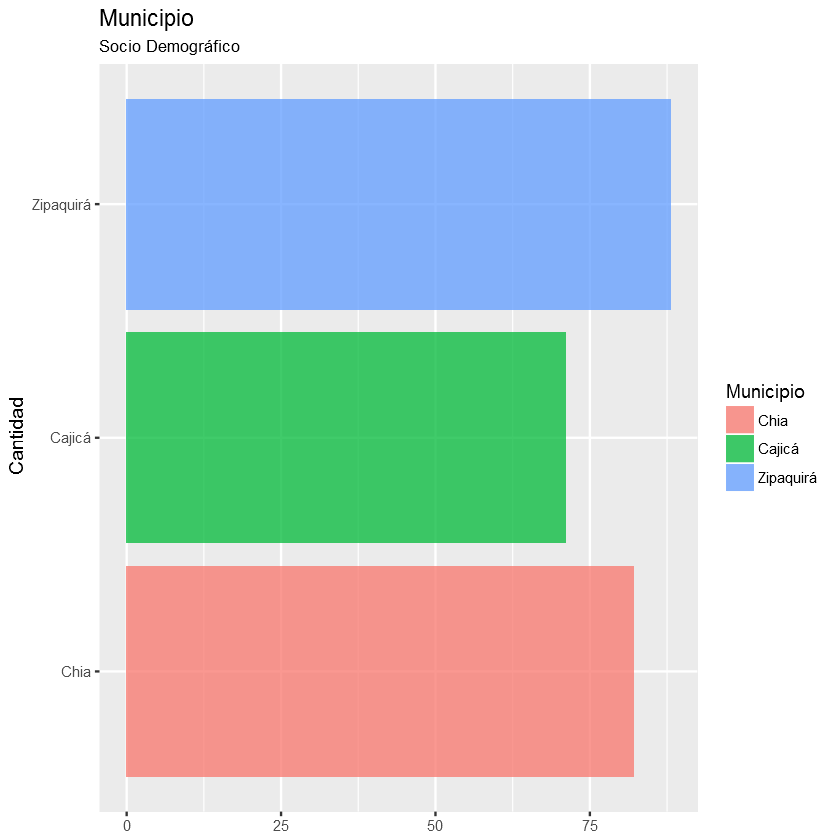

[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico 2_Edad_ Variable 7"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   41.00   41.05   52.00   80.00 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


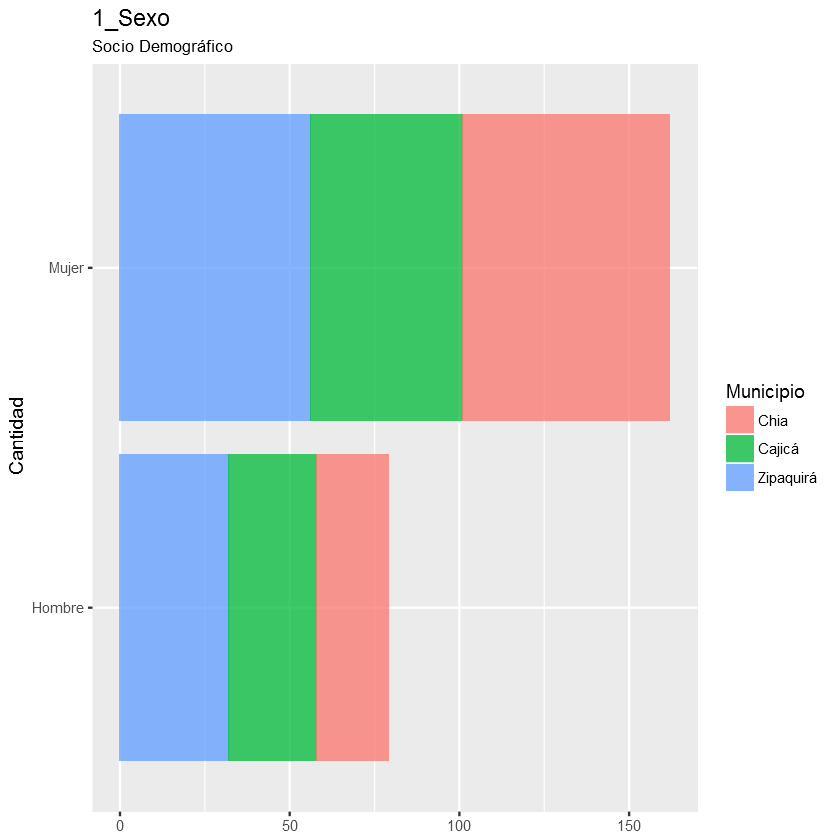

[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico 3_Solo_Mujeres_Actualmente_es_ Variable 8"
           Madre_Lactante Madre_Gestante No_Aplica No reporta
No reporta           0.00           0.00      0.00          0
Chia                 1.24           0.41     32.37          0
Cajicá               1.66           0.83     26.97          0
Zipaquirá            3.73           1.66     31.12          0
                     6.63           2.90     90.46          0


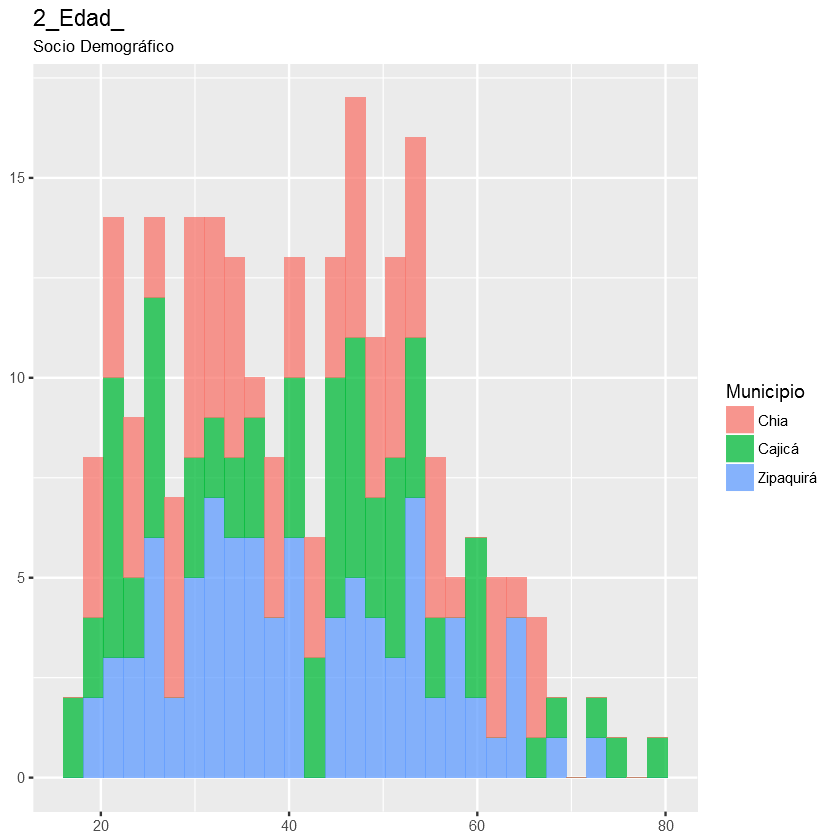

[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico 4_Tiene_Hijos Variable 9"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.00 26.56  7.47
Cajicá           0.41 23.65  5.39
Zipaquirá        0.00 32.78  3.73
                 0.41 82.99 16.59


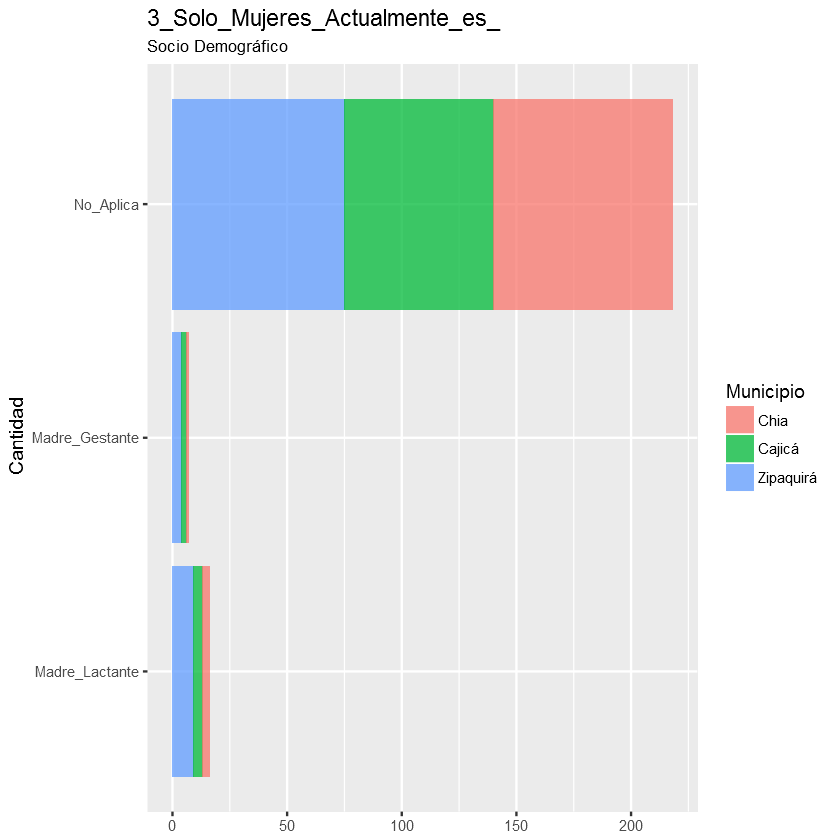

[1] "ASPECTOS SOCIODEMOGRÁFICOS Socio Demográfico 5_No_Hijjos_Cuantos_hijos_tiene_ Variable 10"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.365   3.000  13.000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


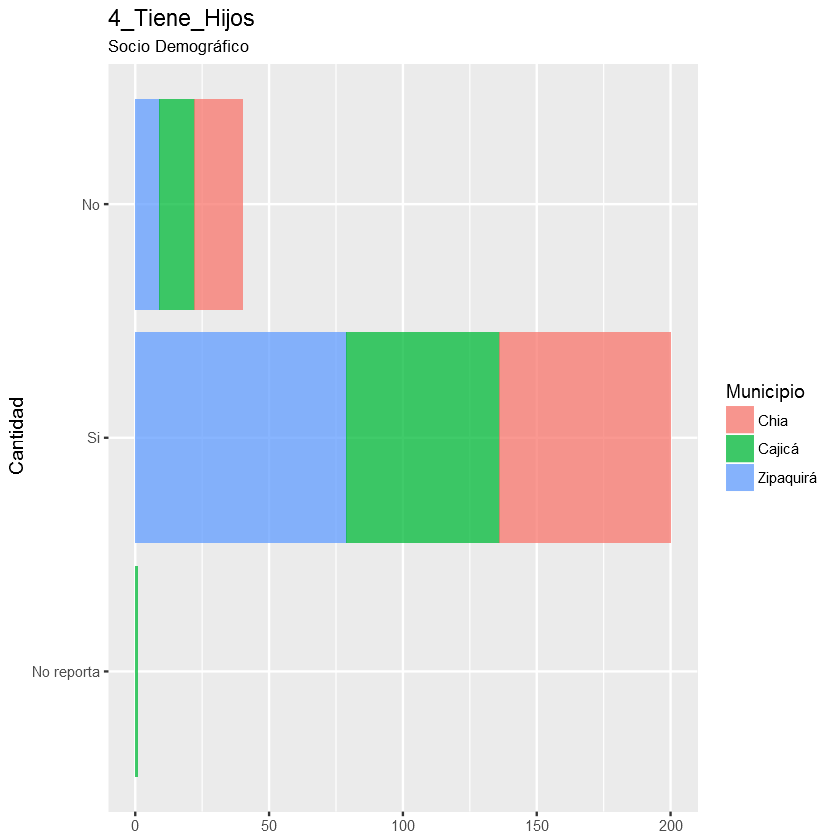

[1] "ASPECTOS SOCIODEMOGRÁFICOS ASPECTOS DE VIVIENDA 7_El_lugar_de_su_vivienda_es_ Variable 13"
           No reporta Propia Arriendo Familiar Cuarto Otro
No reporta       0.00   0.00     0.00     0.00      0 0.00
Chia             0.83   7.88    15.77     9.13      0 0.41
Cajicá           0.83   5.39    17.01     5.39      0 0.83
Zipaquirá        0.41   8.71    19.09     7.88      0 0.41
                 2.07  21.98    51.87    22.40      0 1.65


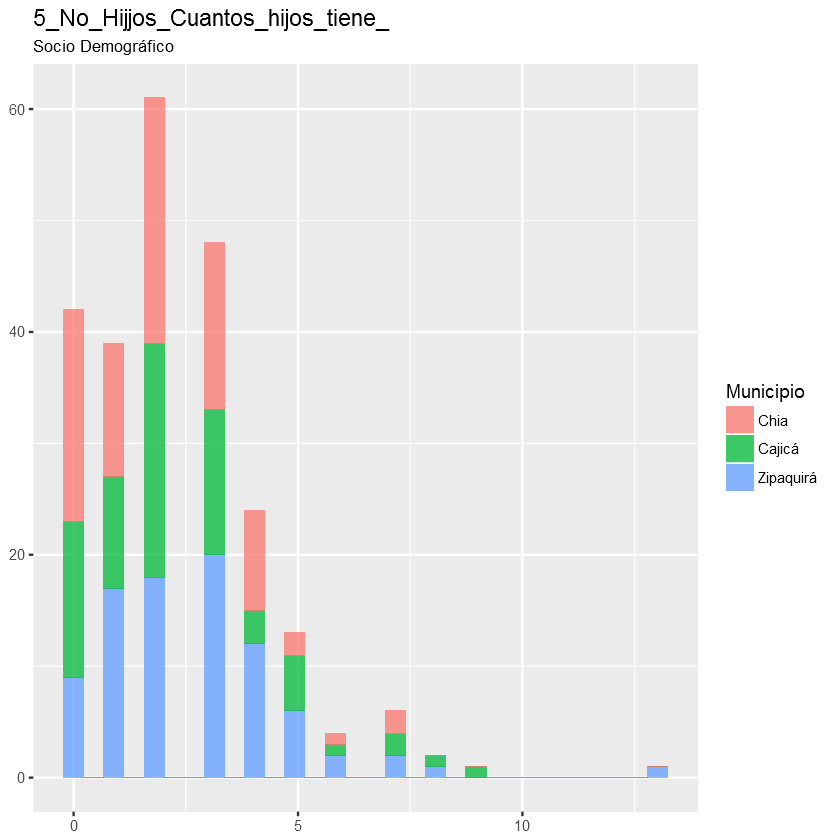

[1] "ASPECTOS SOCIODEMOGRÁFICOS ASPECTOS DE VIVIENDA 8_El_material_de_su_vivienda_es_ Variable 15"
           No reporta Ladrillo_o_cemento Madera Plástico_o_asbesto Otro
No reporta       0.00               0.00   0.00               0.00 0.00
Chia             0.00              31.54   1.24               0.41 0.83
Cajicá           0.41              27.80   0.83               0.00 0.41
Zipaquirá        0.83              32.37   1.66               0.41 1.24
                 1.24              91.71   3.73               0.82 2.48


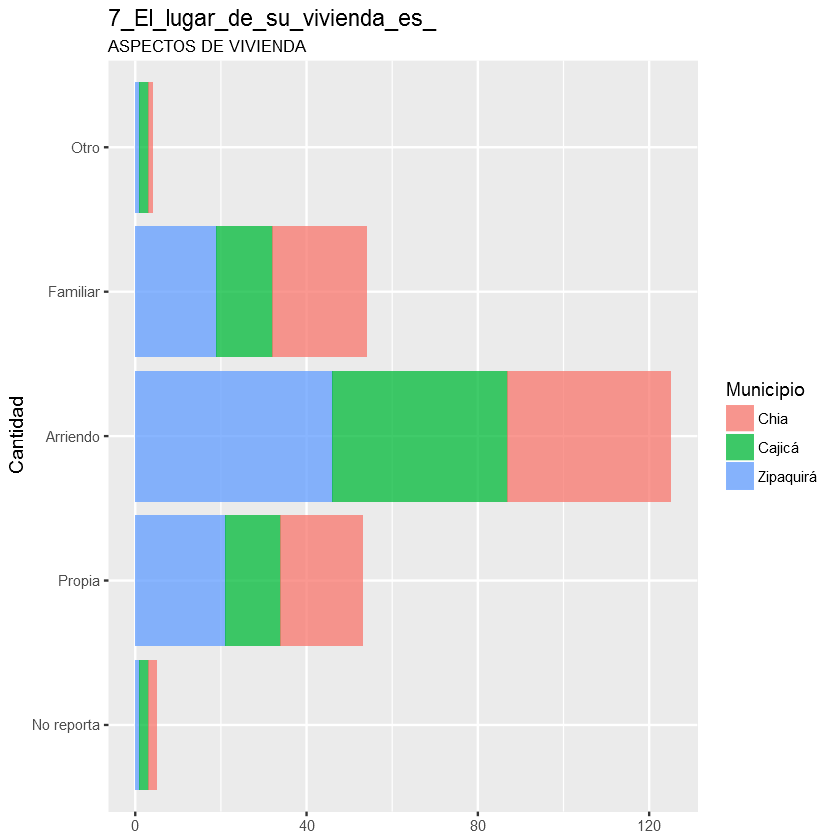

[1] "ASPECTOS SOCIODEMOGRÁFICOS ASPECTOS DE VIVIENDA 9_Su_vivienda_está_en_una_zona_de_riesgo? Variable 17"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.00  1.24 32.78
Cajicá           0.00  2.07 27.39
Zipaquirá        0.41  7.88 28.22
                 0.41 11.19 88.39


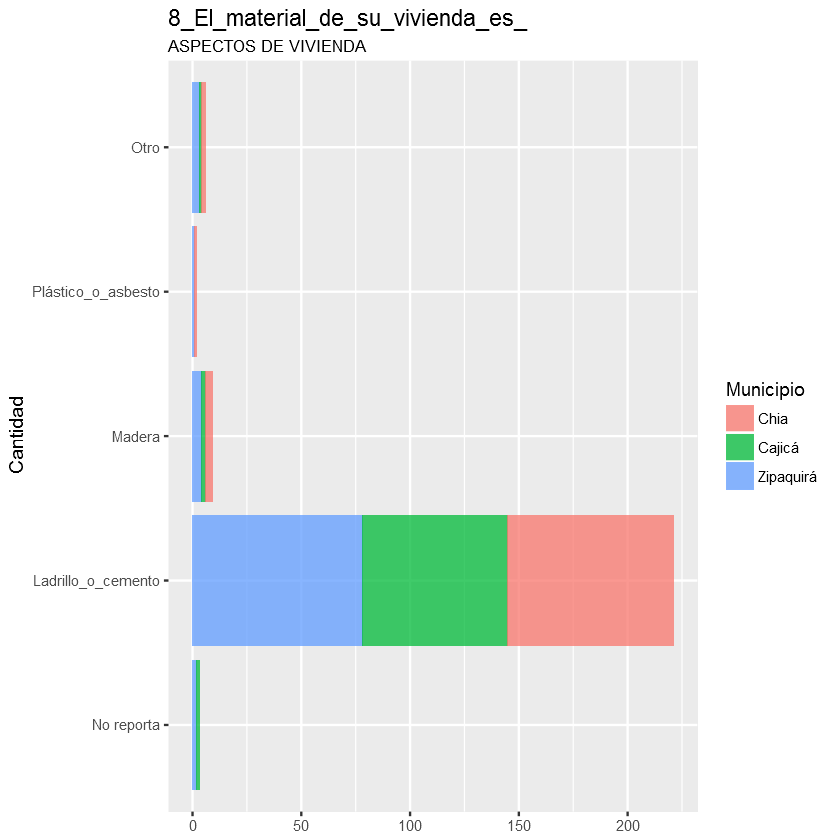

[1] "ASPECTOS SOCIODEMOGRÁFICOS ASPECTOS DE VIVIENDA 10_Estrato_ Variable 19"
           No reporta   Uno   Dos  Tres Cuatro Cinco Seis
No reporta       0.00  0.00  0.00  0.00   0.00     0    0
Chia             0.00  3.32 21.16  7.88   1.66     0    0
Cajicá           1.24 10.79 14.11  3.32   0.00     0    0
Zipaquirá        0.00 21.58  9.54  5.39   0.00     0    0
                 1.24 35.69 44.81 16.59   1.66     0    0


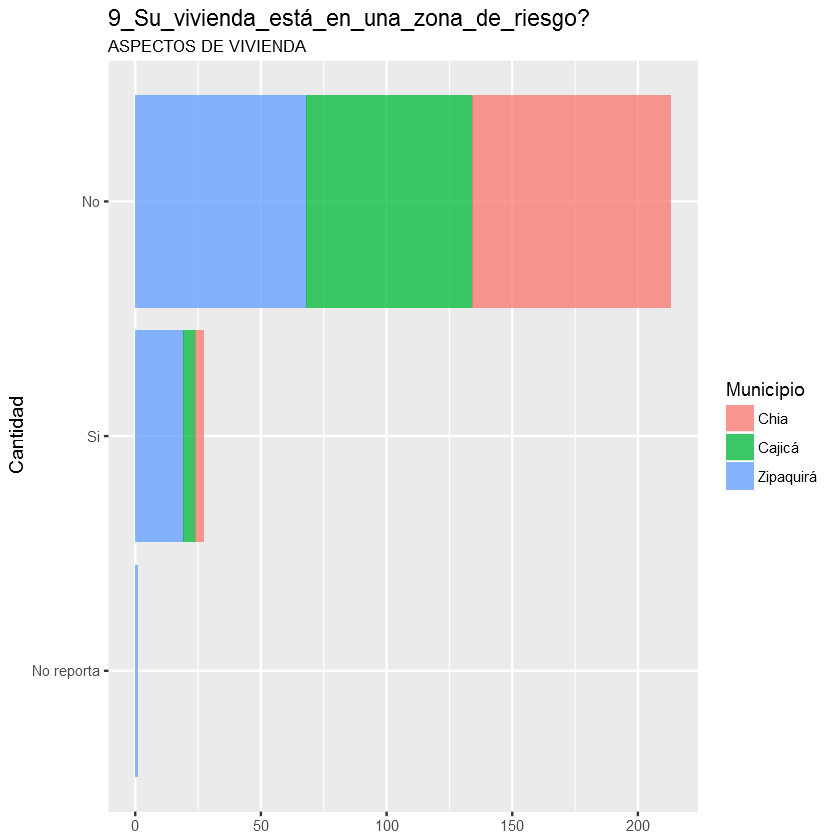

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 12_Su_Sistema_Seguridad_Social_ Variable 28"
           No reporta SISBEN CONTRIBUTIVO No_tiene_actualmente
No reporta          0   0.00         0.00                 0.00
Chia                0  12.86        19.92                 1.24
Cajicá              0  17.01        12.03                 0.41
Zipaquirá           0  21.16        14.11                 1.24
                    0  51.03        46.06                 2.89


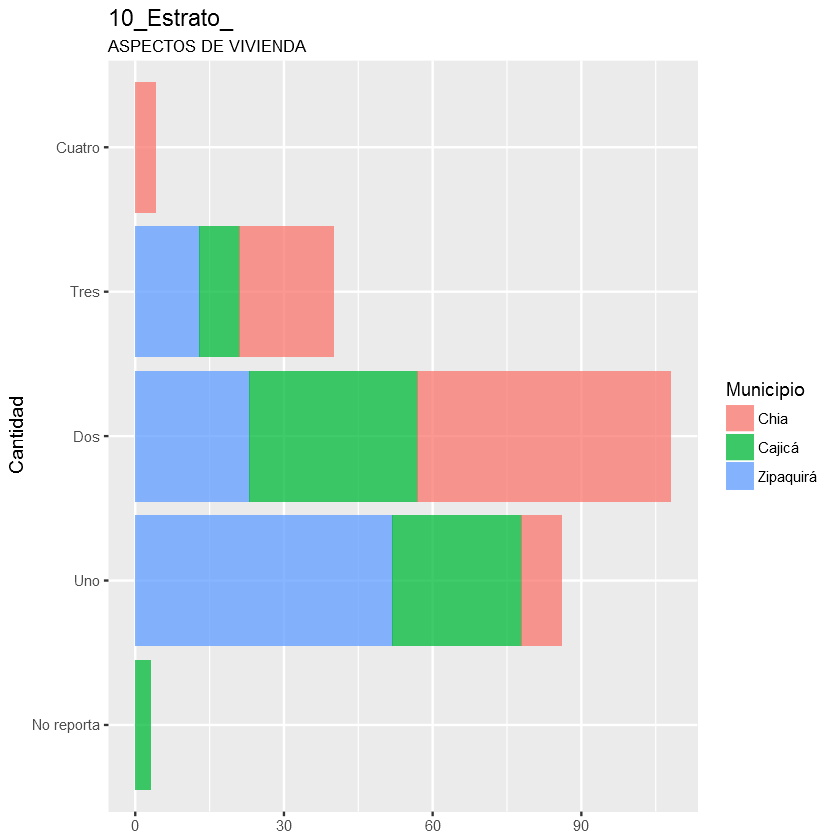

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 13_Pertenece_a_algún_grupo_Étnico_Afrocolombiano_u_otro? Variable 29"
           No reporta   Si    No
No reporta       0.00 0.00  0.00
Chia             0.00 2.49 31.54
Cajicá           0.83 2.49 26.14
Zipaquirá        0.00 0.00 36.51
                 0.83 4.98 94.19


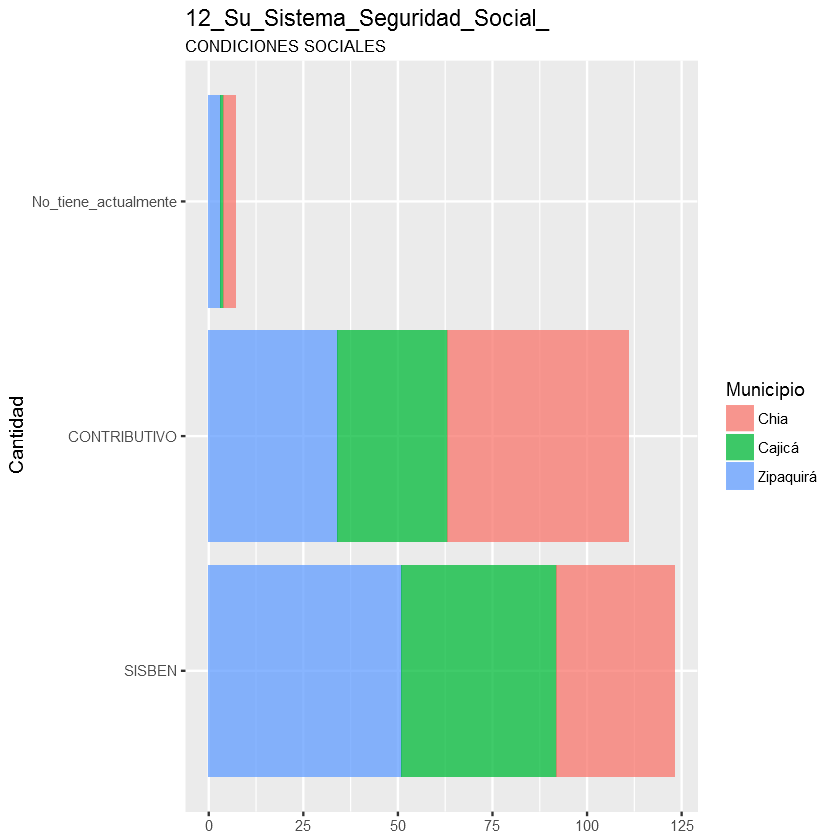

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 15_Pertenece_a_alguno_de_los_grupos_LGBTI? Variable 33"
           No reporta   Si    No
No reporta       0.00 0.00  0.00
Chia             0.41 0.00 33.61
Cajicá           0.41 0.41 28.63
Zipaquirá        0.41 0.41 35.68
                 1.23 0.82 97.92


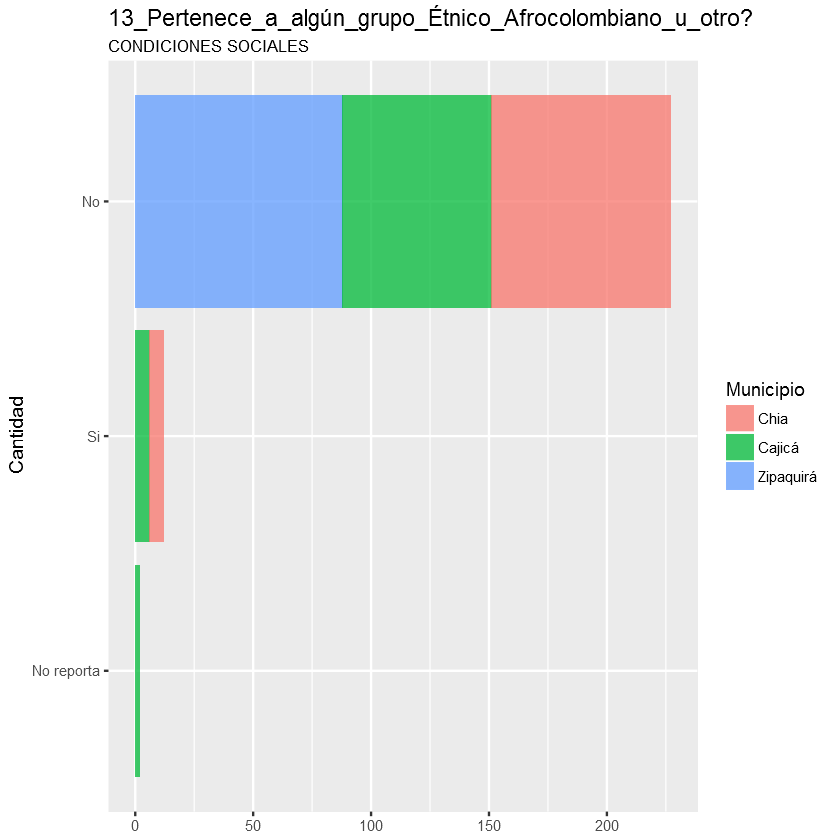

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 16_Presenta_alguna_discapacidad?_ Variable 35"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.00  2.90 31.12
Cajicá           0.41  4.15 24.90
Zipaquirá        0.00  4.15 32.37
                 0.41 11.20 88.39


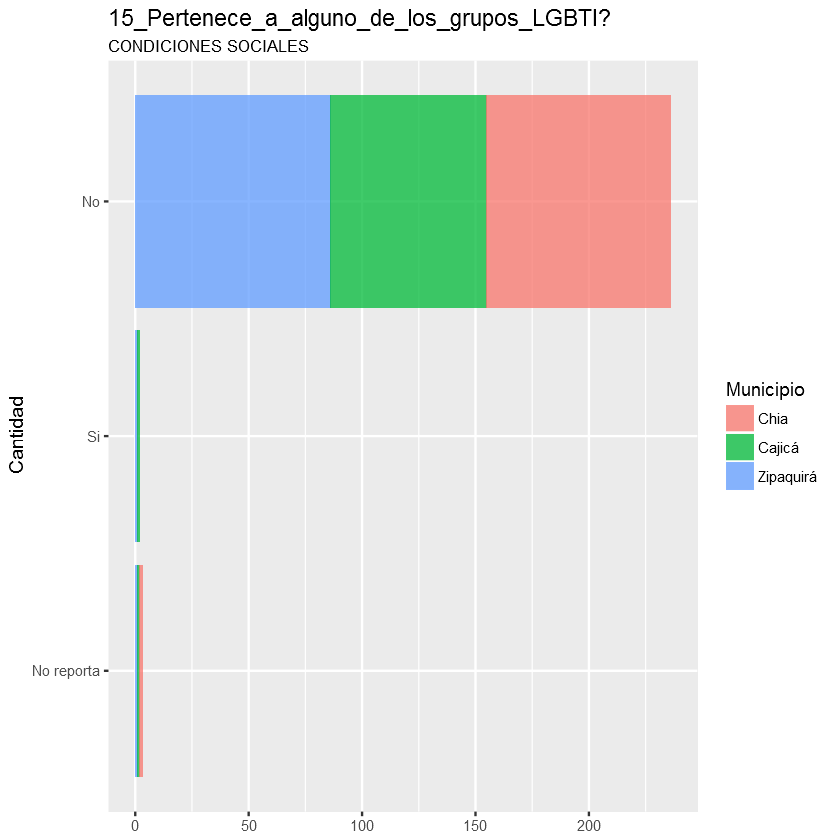

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 18_Estado_Civil_ Variable 38"
           No reporta Soltero_a_ Casado_a_ Viudo_a_ Separado_a_ Unión_Libre
No reporta       0.00       0.00      0.00     0.00        0.00        0.00
Chia             0.41      12.03      6.64     1.24        3.73        9.96
Cajicá           0.00      11.20      3.73     0.83        4.15        9.54
Zipaquirá        0.41       8.71      7.47     2.49        4.15       13.28
                 0.82      31.94     17.84     4.56       12.03       32.78


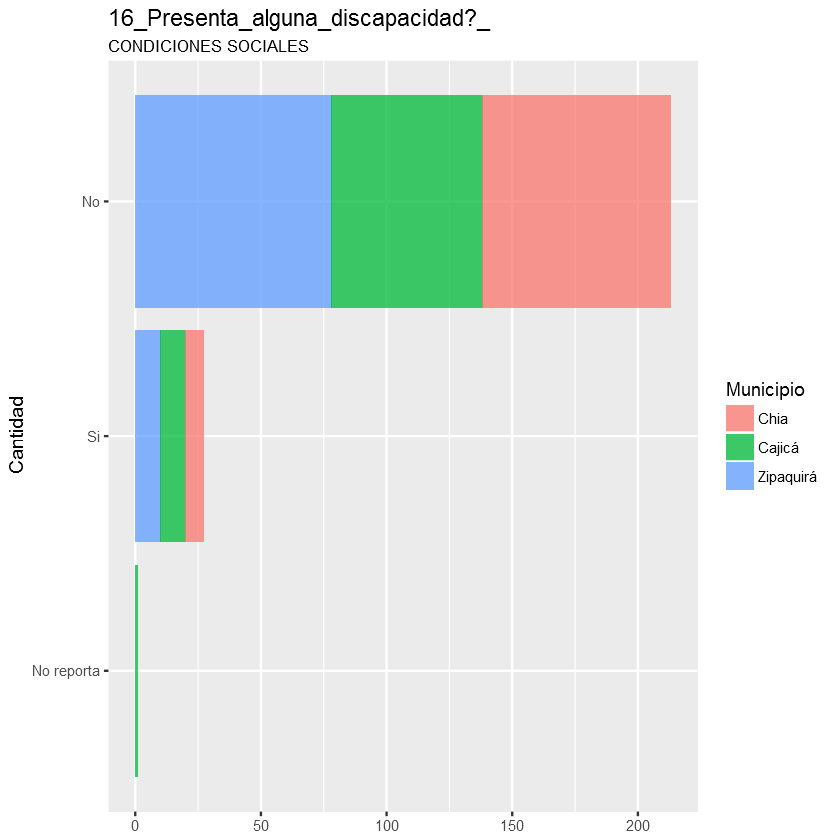

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 20_Actualmente_estudia?_ Variable 40"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.42  5.83 27.50
Cajicá           0.83  3.75 25.00
Zipaquirá        0.00  2.92 33.75
                 1.25 12.50 86.25


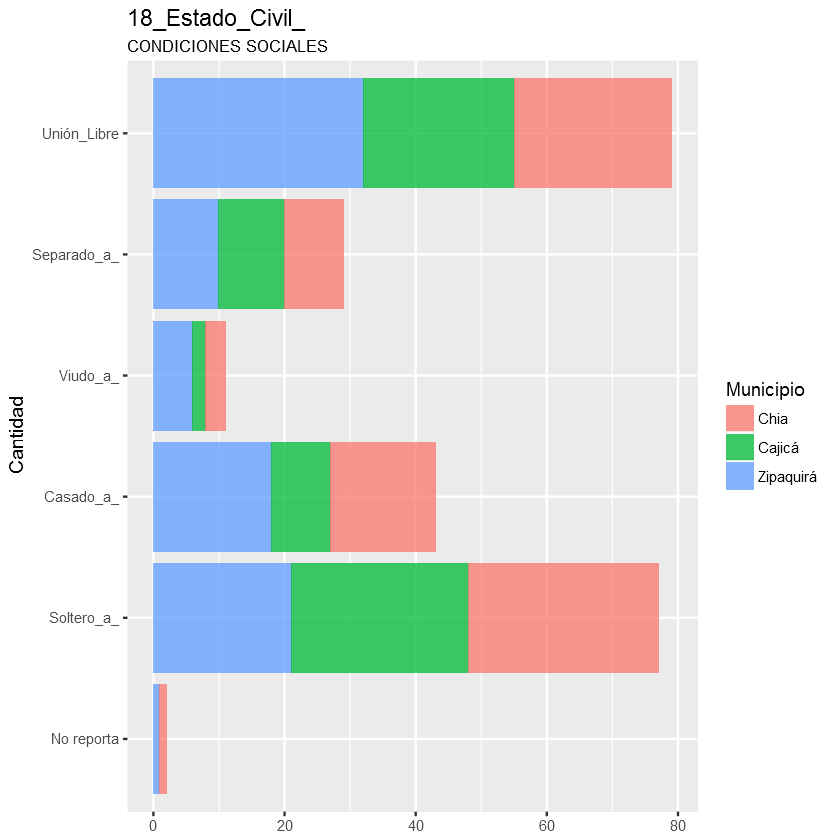

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 21_Nivel_Educativo_ Variable 42"
           No reporta Primaria Bachiller Técnico Tecnólogo_ Profesional
No reporta       0.00     0.00      0.00    0.00       0.00        0.00
Chia             0.41     5.39     17.01    3.73       1.66        4.98
Cajicá           0.41    10.79     10.79    4.98       0.00        1.66
Zipaquirá        0.41    11.62     15.77    2.07       2.90        1.24
                 1.23    27.80     43.57   10.78       4.56        7.88
           Posgrado Ninguno
No reporta     0.00    0.00
Chia           0.41    0.41
Cajicá         0.41    0.41
Zipaquirá      0.41    2.07
               1.23    2.89


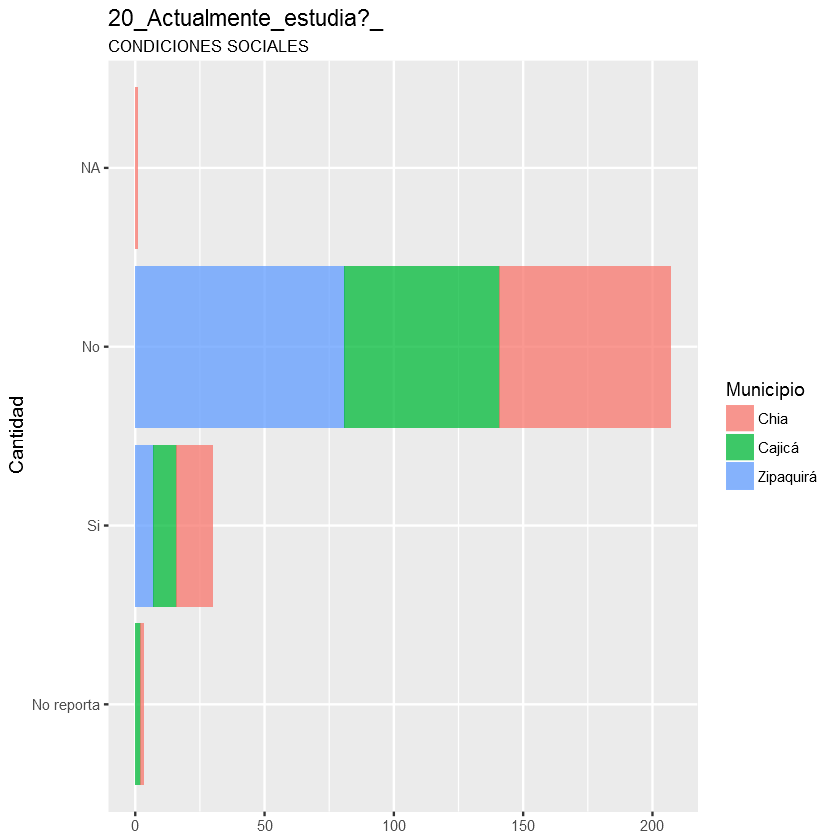

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 22_Ocupación_actual_ Variable 43"
           No reporta Empleado Independiente Estudia Hogar Desempleado_
No reporta       0.00     0.00          0.00    0.00  0.00         0.00
Chia             0.83     8.71         16.60    1.66  2.07         4.15
Cajicá           0.41    10.79          9.96    2.07  2.49         3.73
Zipaquirá        0.41     5.81         17.43    1.24  8.30         3.32
                 1.65    25.31         43.99    4.97 12.86        11.20


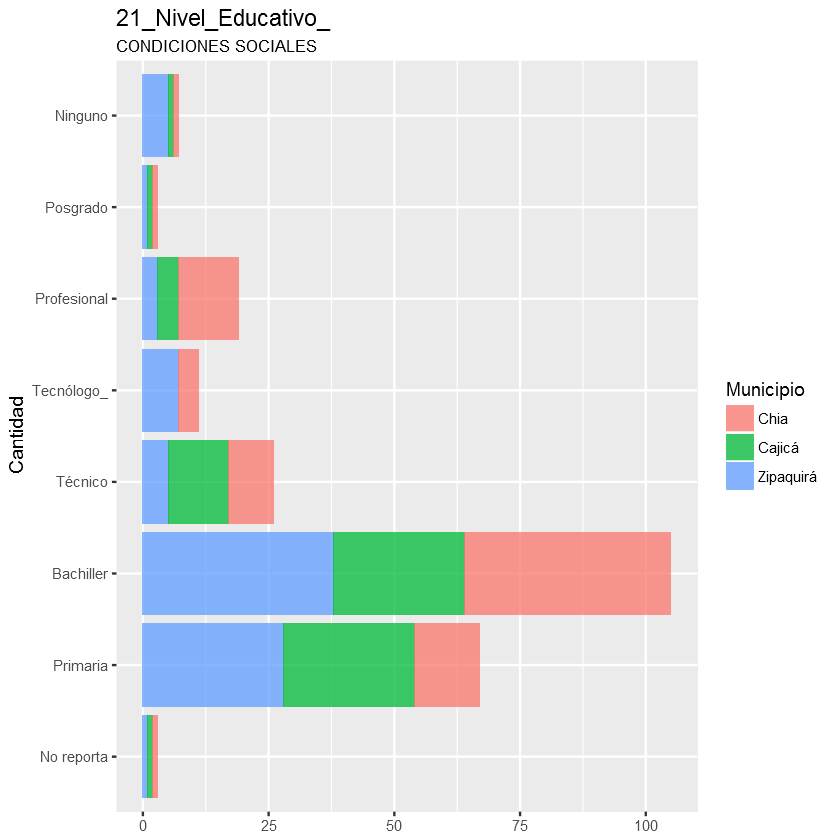

[1] "ASPECTOS SOCIODEMOGRÁFICOS CONDICIONES SOCIALES 23_Tipo_de_Ocupación_Oficio_ Variable 44"
           No reporta Asistente_Oficina Carnicero_a_ Comerciante Conductor_a_
No reporta       0.00              0.00            0        0.00            0
Chia             4.61              0.00            0        4.61            0
Cajicá           3.29              0.66            0        1.97            0
Zipaquirá        3.29              0.00            0        1.97            0
                11.19              0.66            0        8.55            0
           Enfermero_a_ Estilista Estudiante Ingeniero_a_Alimentos Mensajero_a_
No reporta         0.00      0.00       0.00                     0         0.00
Chia               0.00      0.00       2.63                     0         0.66
Cajicá             0.66      0.00       2.63                     0         0.00
Zipaquirá          0.00      0.66       1.32                     0         0.00
                   0.66      0.66    

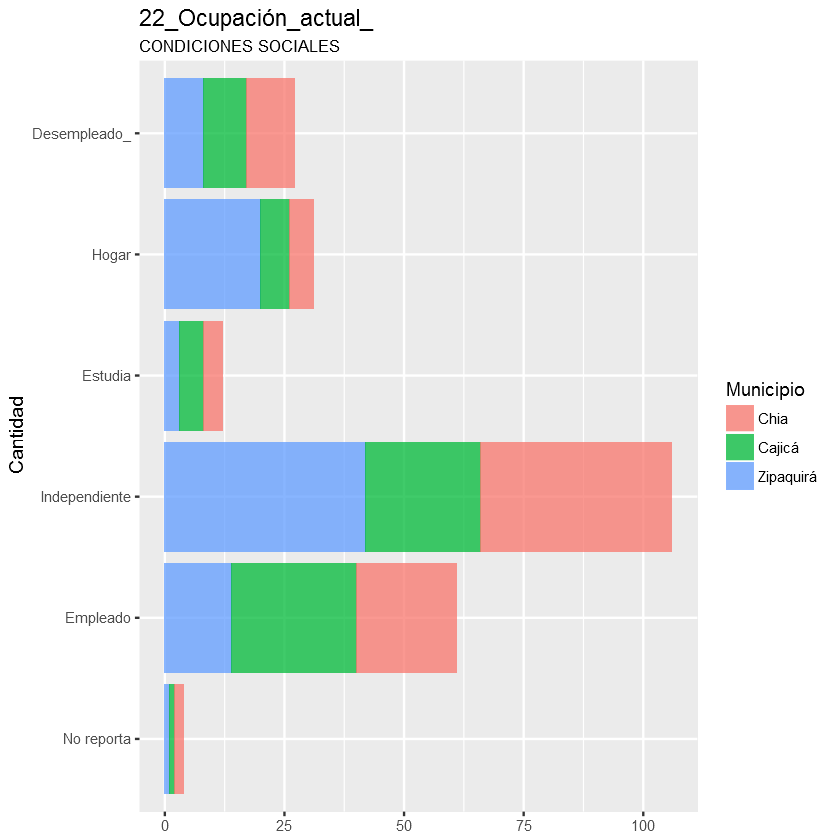

[1] "ASPECTOS SOCIODEMOGRÁFICOS INGRESOS FAMILIARES 24_Ingreso_mensual_promedio_de_la_familia Variable 45"
           No reporta Menos_de_$680000 Entre_$700000_y_$1000000_
No reporta       0.00             0.00                       0.00
Chia             0.00            14.94                      11.20
Cajicá           1.66            18.67                       5.81
Zipaquirá        3.32            21.16                       7.47
                 4.98            54.77                      24.48
           Entre_$1000000_y_$1999999 Entre_$2000000_y_$2999999
No reporta                        0.00                        0.00
Chia                              5.39                        1.66
Cajicá                            2.07                        0.41
Zipaquirá                         3.32                        0.83
                                 10.78                        2.90
           Entre_$3000000_y_$3999999 Más_de_$4000000
No reporta                        0.00 

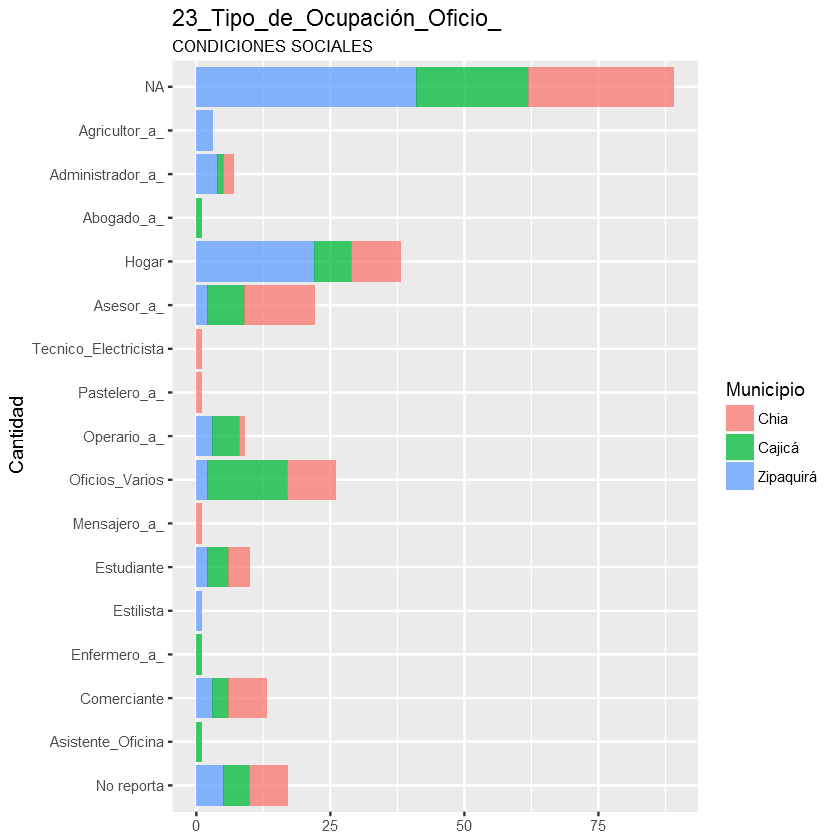

[1] "ASPECTOS SOCIODEMOGRÁFICOS INGRESOS FAMILIARES  Ingreso_expresado_  Variable 46"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0  200000  680000  678900  800000 5000000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


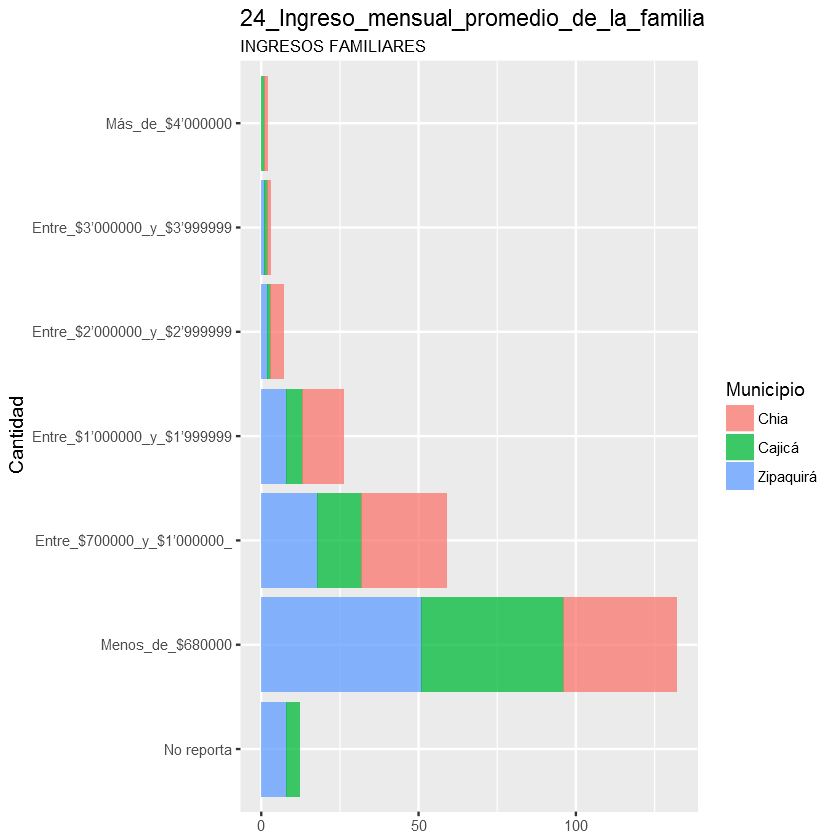

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 25_Madre_Padre_cabeza_de_hogar?_ Variable 57"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.41 18.26 15.35
Cajicá           0.41 16.60 12.45
Zipaquirá        0.83 21.16 14.52
                 1.65 56.02 42.32


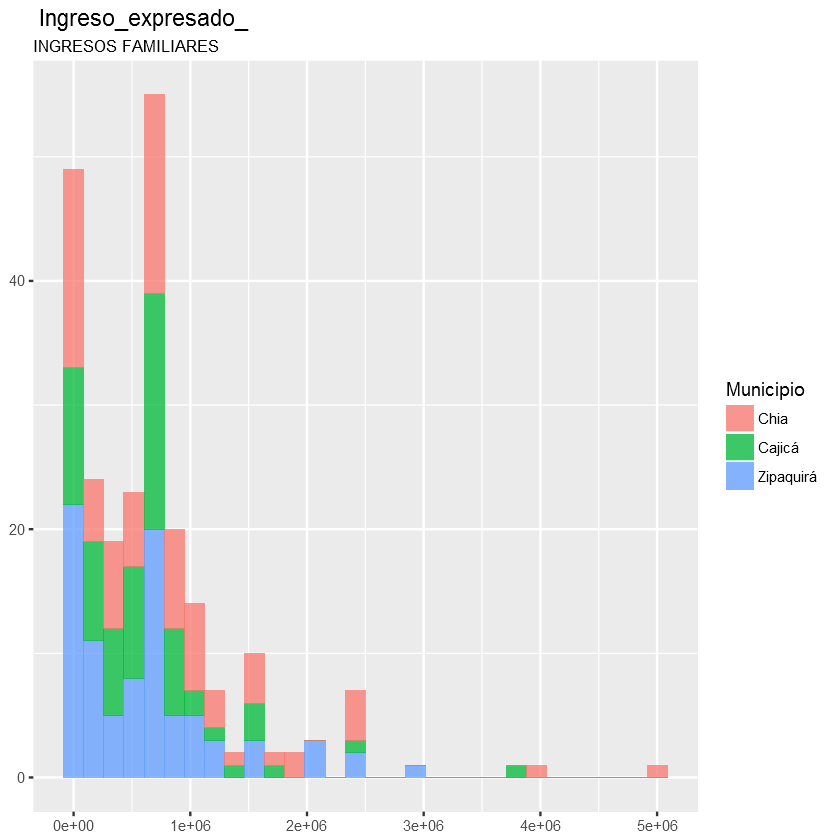

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 26_Madre_Padre_soltero? Variable 58"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             1.24 10.37 22.41
Cajicá           1.66 12.86 14.94
Zipaquirá        3.73 10.37 22.41
                 6.63 33.60 59.76


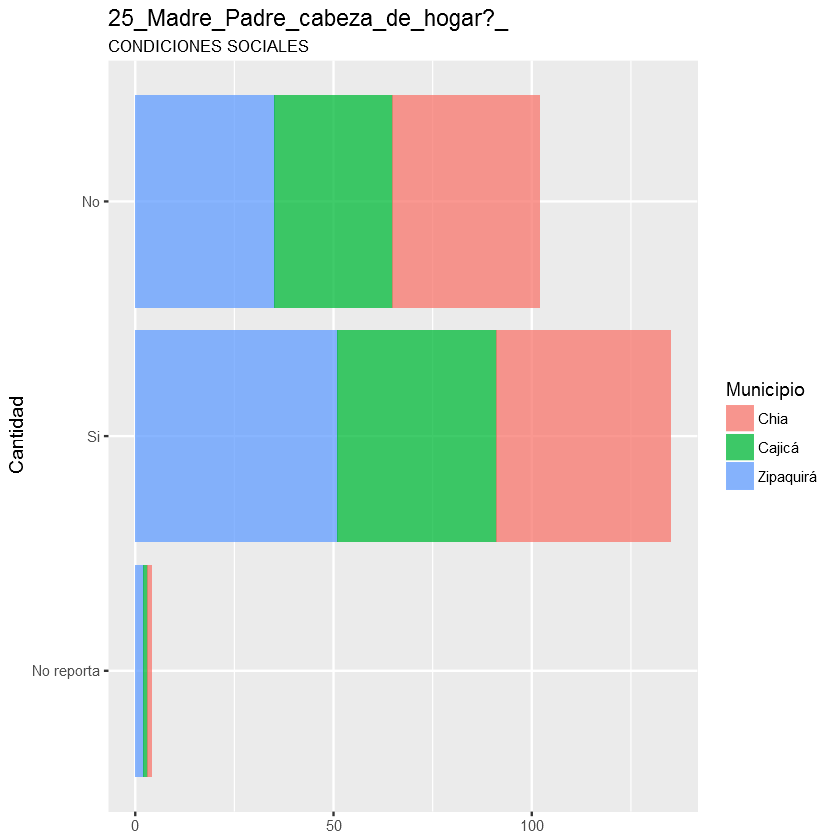

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 27_Cuál_es_la_cabeza_del_hogar?_ Variable 59"
           No reporta Solo_Hombre Solo_Mujer Ambos
No reporta       0.00        0.00       0.00  0.00
Chia             0.41        4.98      11.62 17.01
Cajicá           0.83        4.56      10.79 13.28
Zipaquirá        0.41        9.54      12.03 14.52
                 1.65       19.08      34.44 44.81


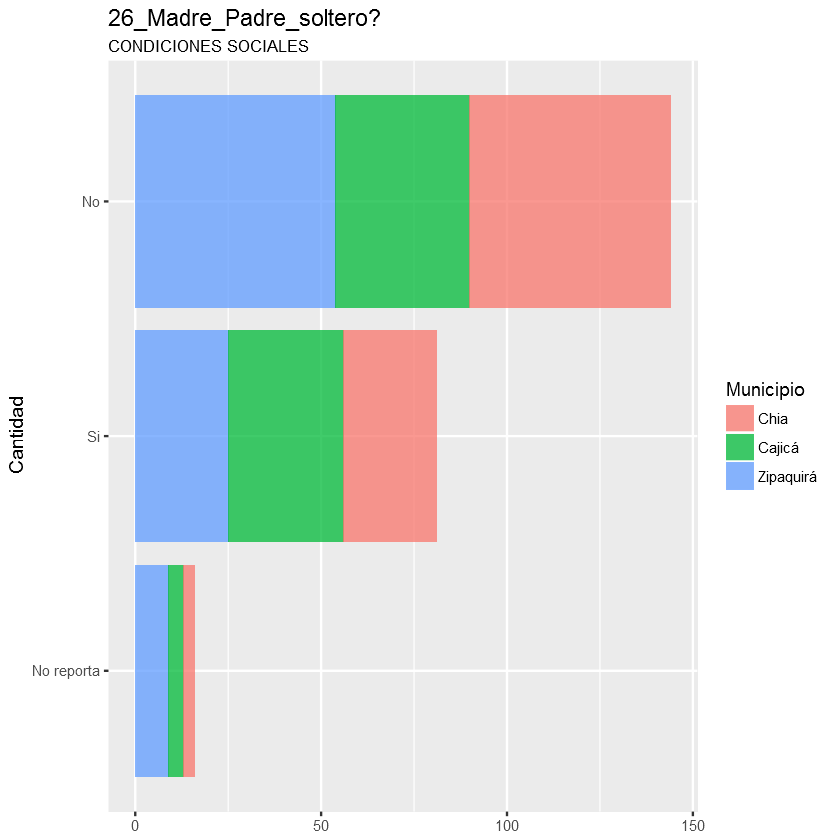

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 28_Cuántas_familias_viven_en_la_casa_en_donde_usted_vive?_ Variable 60"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.602   2.000   7.000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


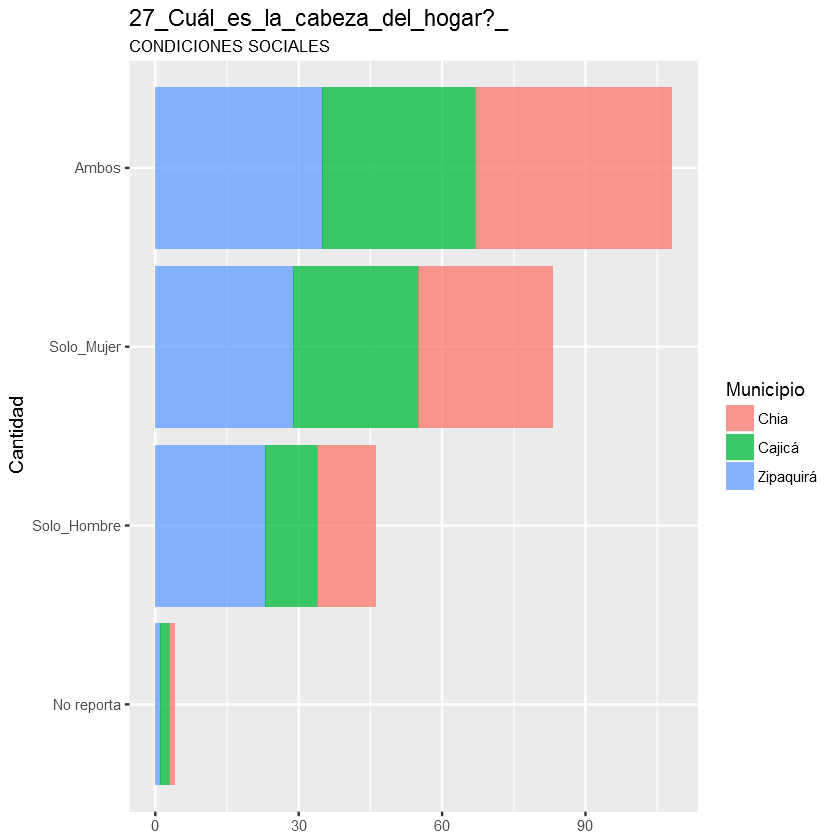

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 29_Cuántas_mujeres_Lactantes_viven_en_su_hogar?_ Variable 61"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2324  0.0000  3.0000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


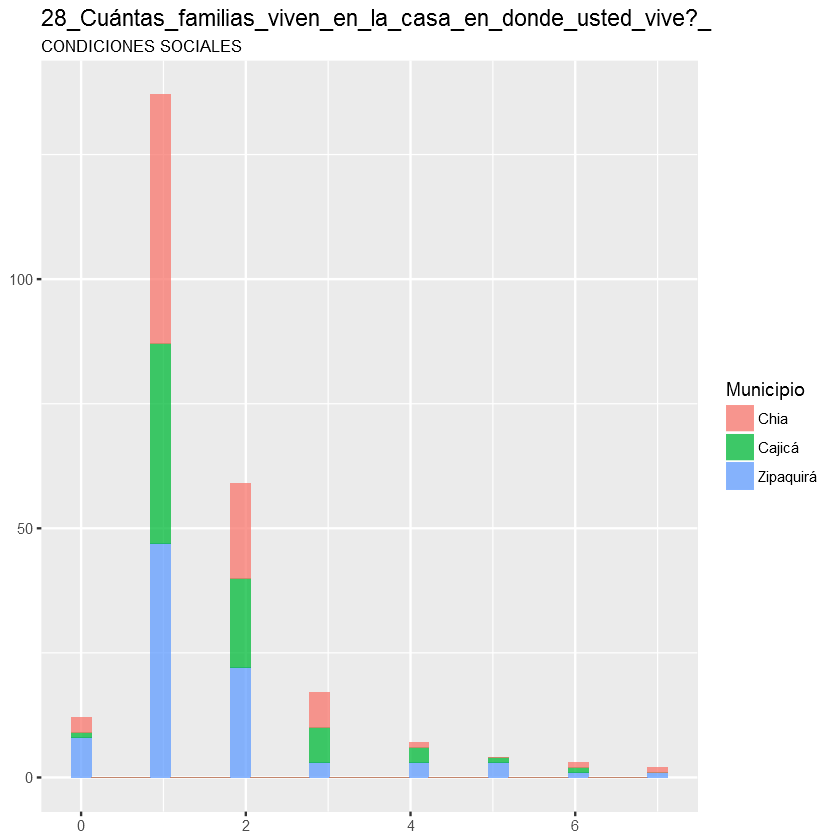

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 30_Cuántas_mujeres_Gestantes_viven_en_su_hogar?_ Variable 62"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1452  0.0000  6.0000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


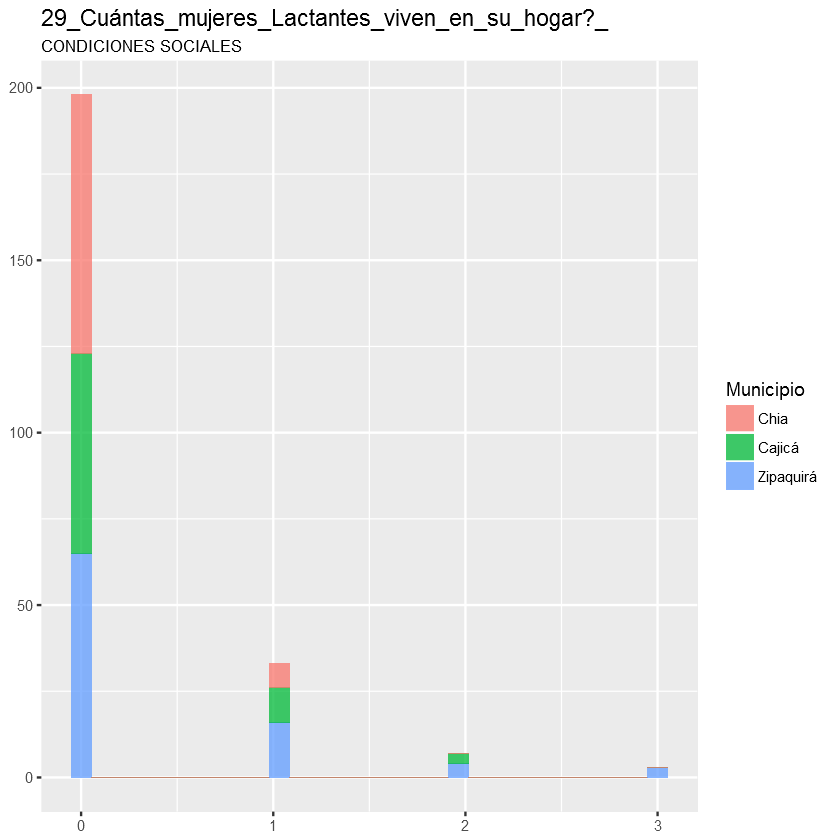

[1] "ASPECTOS FAMILIARES CONDICIONES SOCIALES 31_No_de_Personas_que_conforman_su_hogar Variable 63"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.00    4.00    4.05    5.00   13.00 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


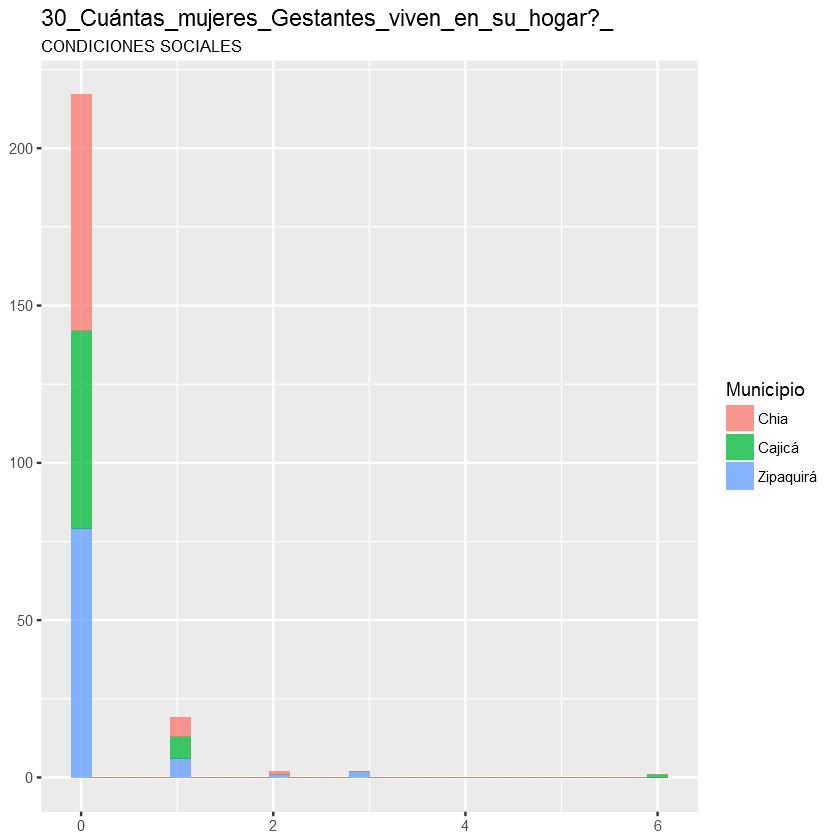

[1] "ASPECTOS FAMILIARES 32. INDIQUE, LAS PERSONAS QUE COMPONEN SU HOGAR (FAMILIARES Y NO FAMILIARES) Y RESPONDA LAS SIGUIENTES CARACTERÍSTICAS (SIN INCLUIR AL ENCUESTADO NUEVAMENTE). 33_Su_grupo_familiar_está_en_estado_de_desplazamiento? Variable 118"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.00  3.73 30.29
Cajicá           0.00 10.37 19.09
Zipaquirá        1.66  1.66 33.20
                 1.66 15.76 82.58


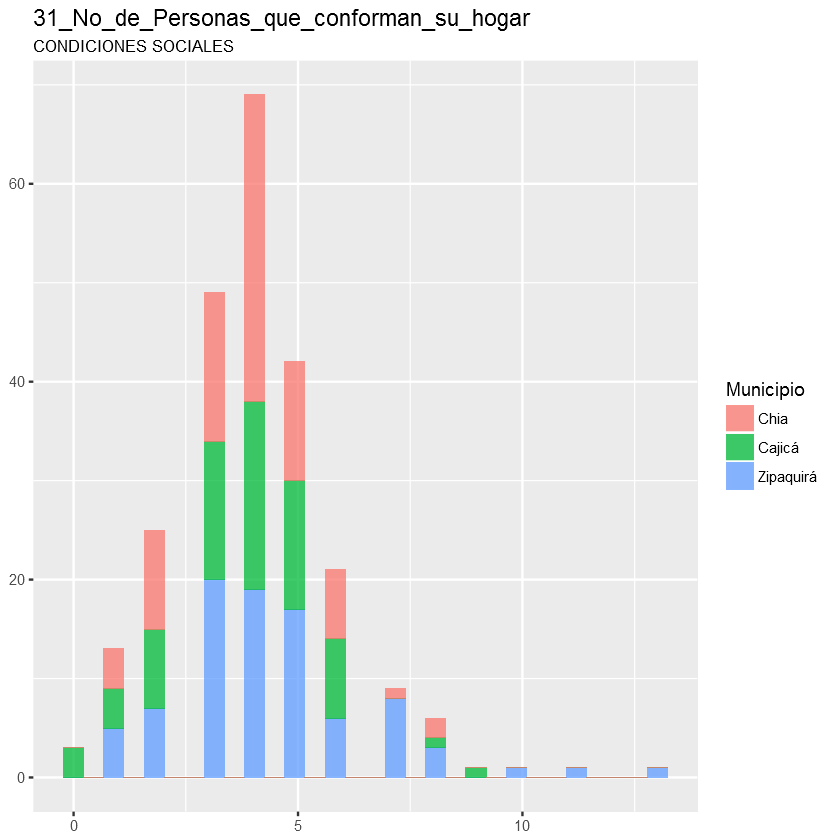

[1] "ASPECTOS FAMILIARES 32. INDIQUE, LAS PERSONAS QUE COMPONEN SU HOGAR (FAMILIARES Y NO FAMILIARES) Y RESPONDA LAS SIGUIENTES CARACTERÍSTICAS (SIN INCLUIR AL ENCUESTADO NUEVAMENTE). Cuánto_tiempo_Años Variable 119"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.631   0.000  30.000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


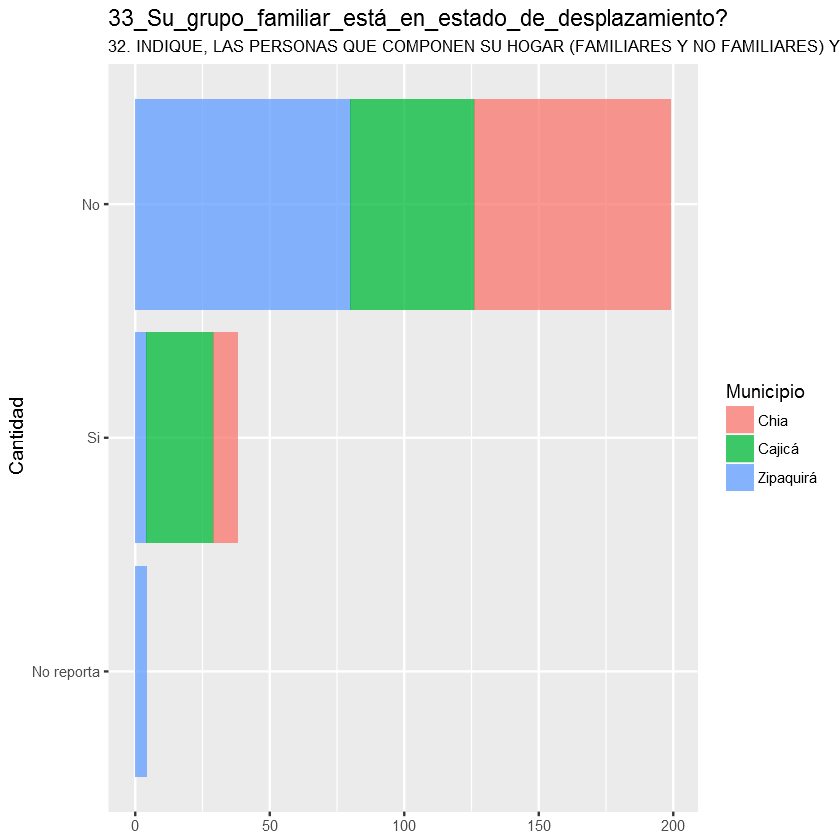

[1] "ASPECTOS FAMILIARES REDES APOYO SOCIALES 34_Su_grupo_familiar_es_beneficiario_de_algún_programa_de_apoyo_social_por_parte_del_Estado_Colombiano?_ Variable 122"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.41  5.39 28.22
Cajicá           0.83  6.22 22.41
Zipaquirá        0.83  7.88 27.80
                 2.07 19.49 78.43


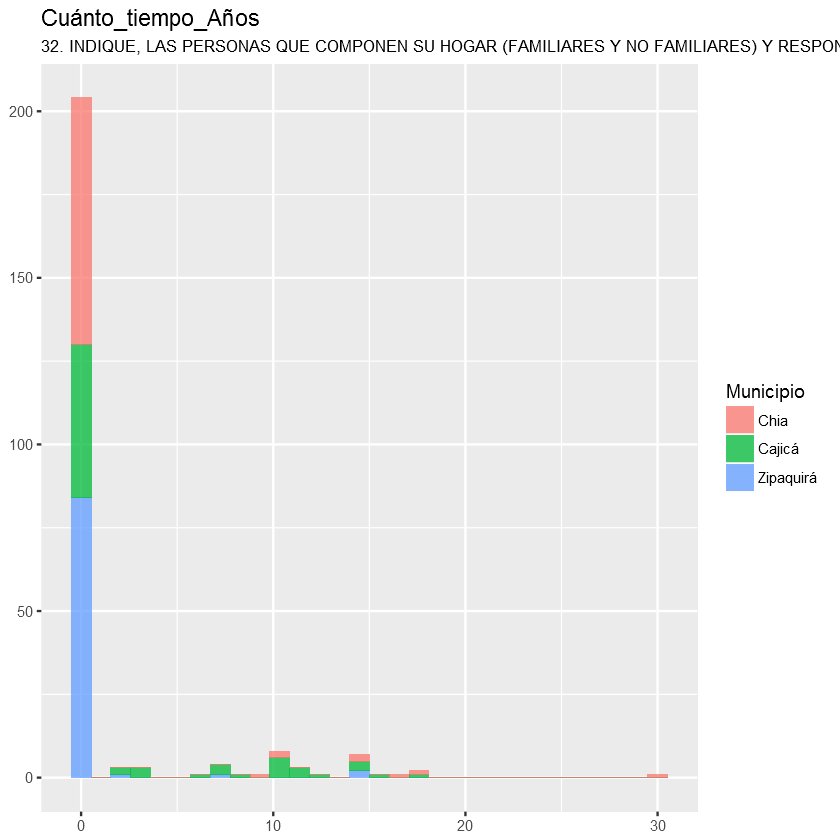

[1] "ASPECTOS FAMILIARES REDES APOYO SOCIALES Cual_Progama_Social Variable 123"
               0     3    4    5    6    7    8    9   10   11   12   13   14
No reporta  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Chia       29.46  2.49 0.83 0.41 0.41 0.41 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Cajicá     24.07  3.73 0.00 0.41 0.00 0.00 0.41 0.41 0.41 0.00 0.00 0.00 0.00
Zipaquirá  28.63  4.98 0.00 0.83 0.00 0.00 0.00 0.41 0.00 0.41 0.41 0.41 0.41
           82.16 11.20 0.83 1.65 0.41 0.41 0.41 0.82 0.41 0.41 0.41 0.41 0.41


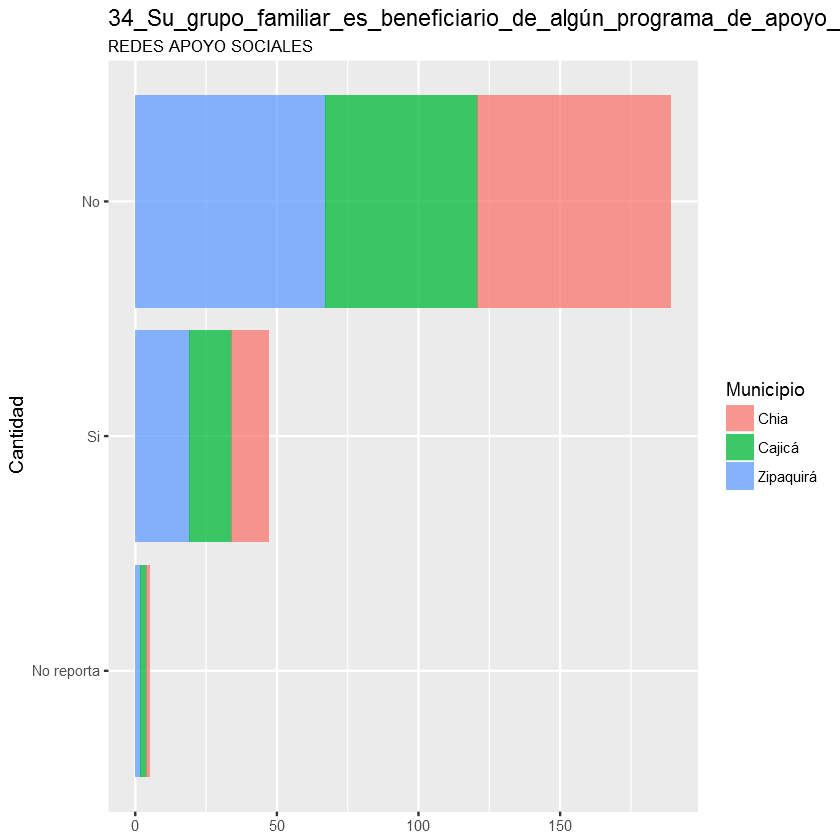

[1] "ASPECTOS FAMILIARES REDES APOYO SOCIALES 35_Algún_integrante_de_su_grupo_familiar_participa_en_organizaciones_sociales_deportivas_comunitarias_ONG_pastorales?_ Variable 126"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.83  8.30 24.90
Cajicá           0.41  5.39 23.65
Zipaquirá        0.41  7.47 28.63
                 1.65 21.16 77.18


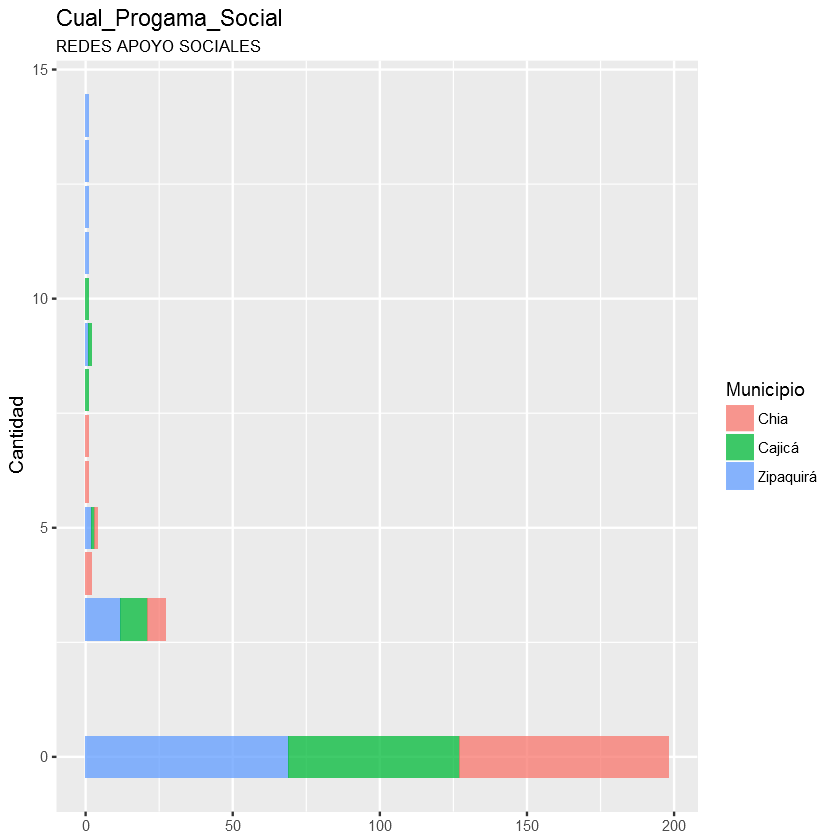

[1] "ASPECTOS FAMILIARES 36. En el último año cuantas veces ha tenido que asistir a una comisaría de familia: #_de_veces Variable 129"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2199  0.0000  8.0000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


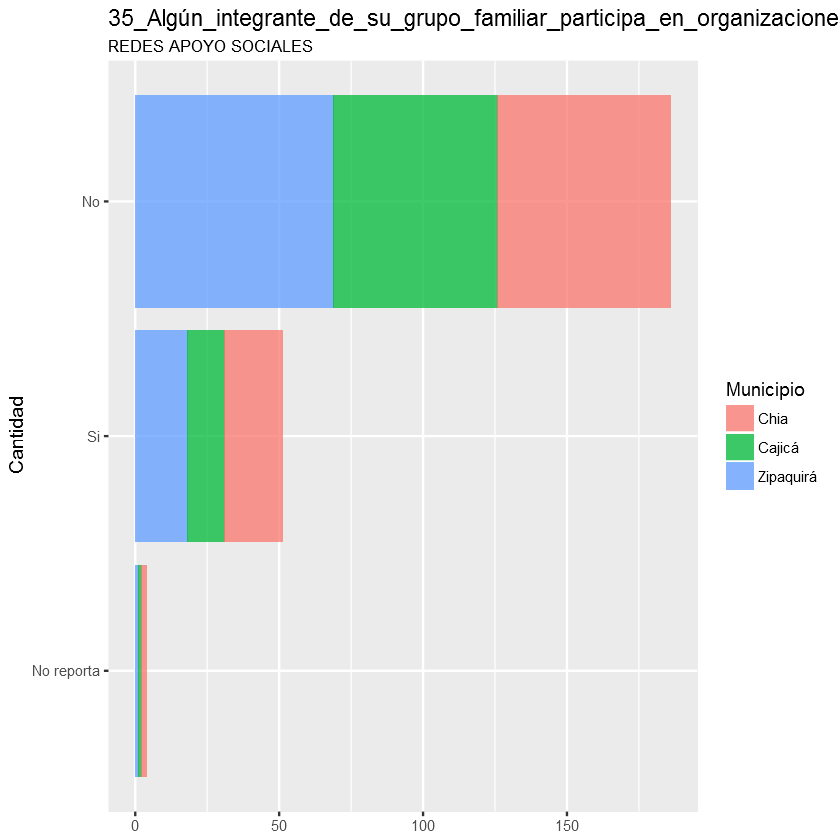

[1] "ASPECTOS FAMILIARES 40. ¿Usted o alguien de su familia ha tenido problemas con la policía/fiscalía en el último año? SI_NO Variable 143"
           No reporta   Si    No
No reporta       0.00 0.00  0.00
Chia             1.24 0.41 32.37
Cajicá           2.07 1.24 26.14
Zipaquirá        0.83 3.73 31.95
                 4.14 5.38 90.46


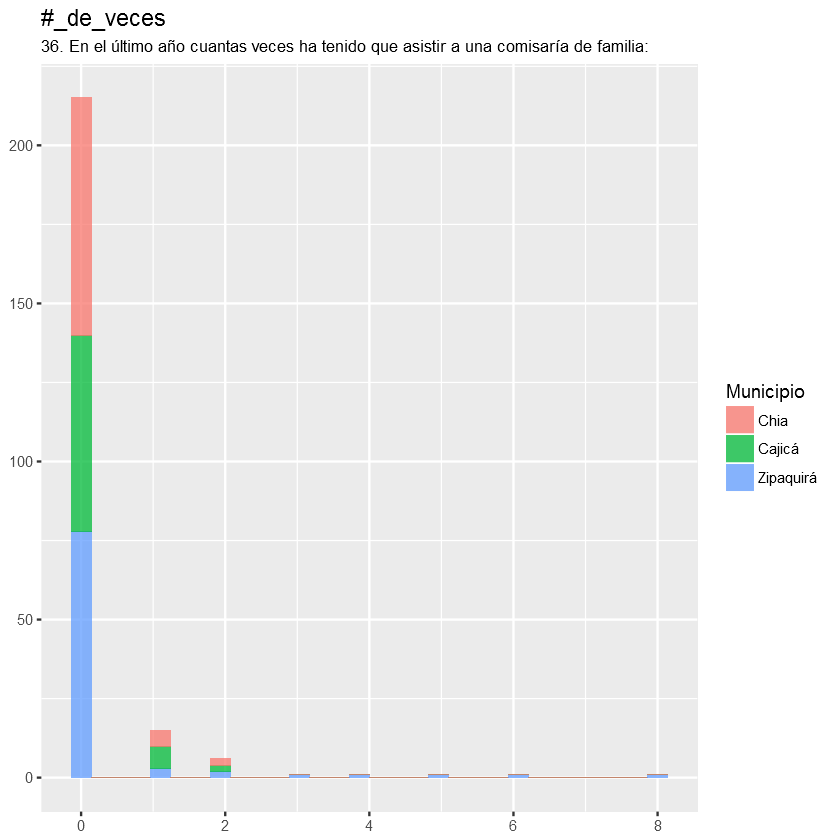

[1] "SALUD Y ALIMENTACIÓN 48. Número de veces al año que asiste a ver a un médico: Veces Variable 194"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   4.892   5.000  90.000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


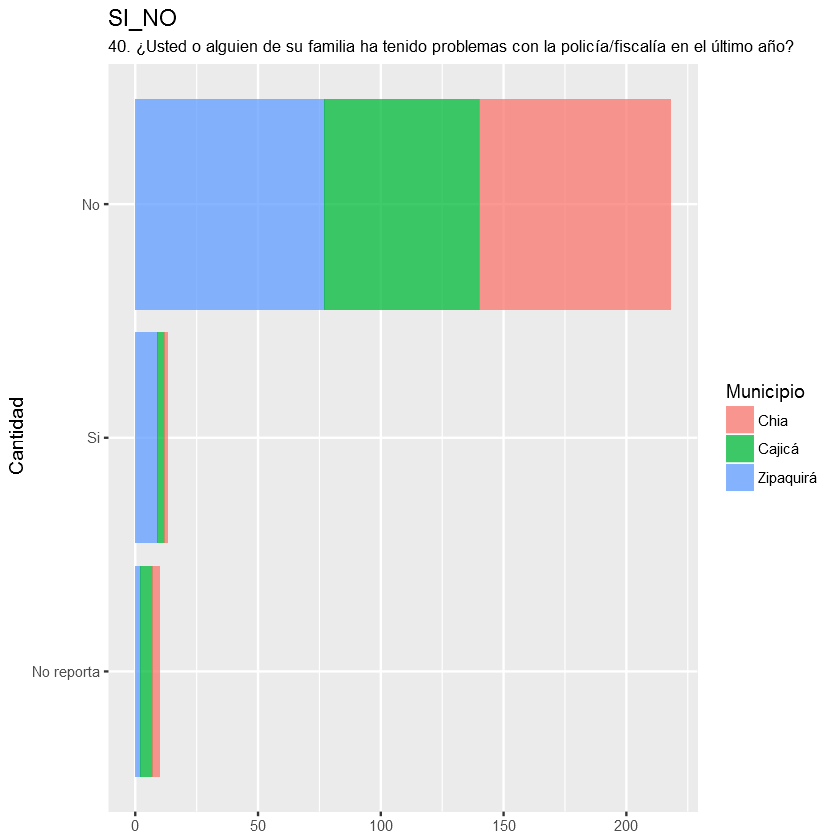

[1] "SALUD Y ALIMENTACIÓN 49. En el último año número de incapacidades Veces_incapacitados Variable 195"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4108  0.0000 15.0000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


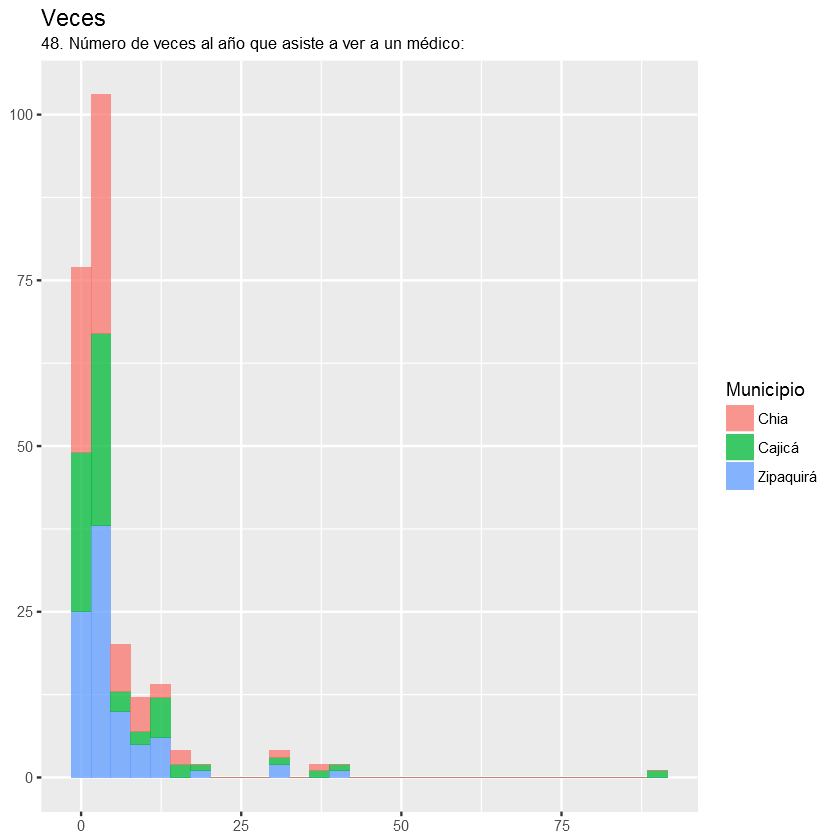

[1] "SALUD Y ALIMENTACIÓN  50. ¿Más o menos cuánta plata gasta diariamente en comida?    Valor_del_gasto_diario  Variable 196"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   10000   15000   15600   20000  100000 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


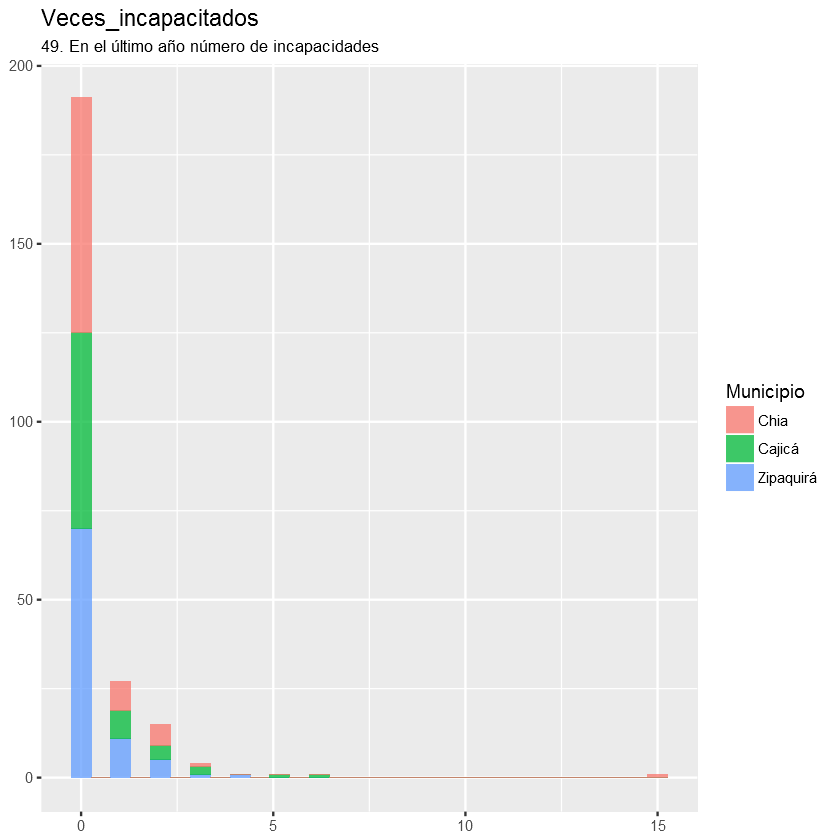

[1] "SALUD Y ALIMENTACIÓN 54. ¿Alguna vez le han dicho a usted o a algún miembro de la familia que tiene problemas de bajo peso o de desnutrición?  SI_NO Variable 216"
           No reporta    Si    No
No reporta       0.00  0.00  0.00
Chia             0.41  5.81 27.80
Cajicá           2.07  2.90 24.48
Zipaquirá        1.24  7.88 27.39
                 3.72 16.59 79.67


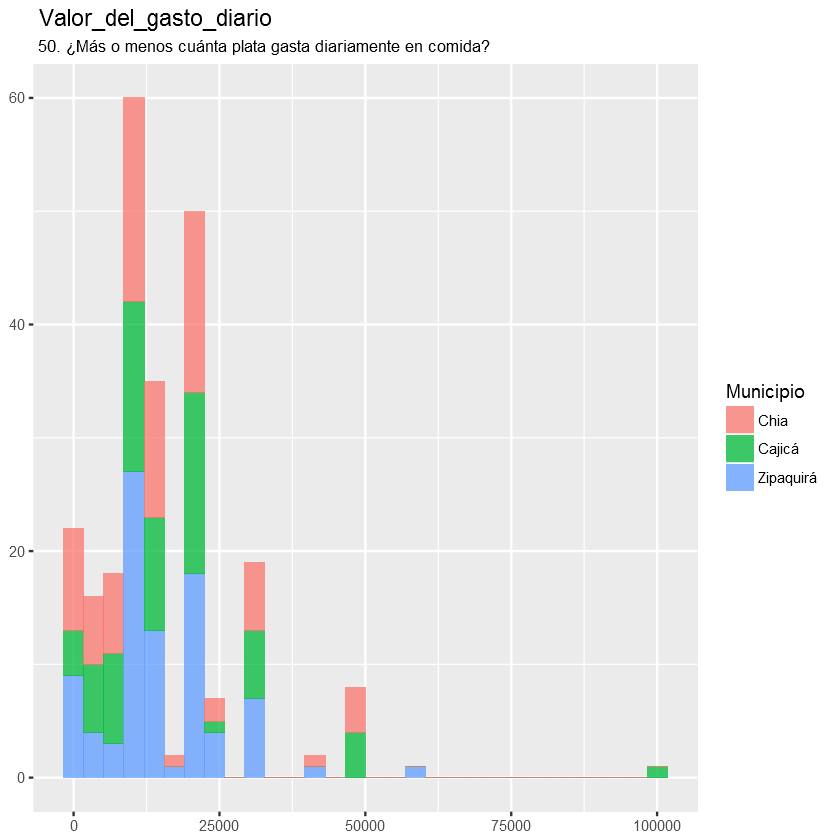

[1] "SEGURIDAD CIUDADANA 56. En el último año ¿algún miembro de la familia ha estado involucrado en la comisión de algún hecho delictivo?  SI_NO Variable 266"
           No reporta   Si    No
No reporta       0.00 0.00  0.00
Chia            13.28 0.41 20.33
Cajicá           0.00 0.41 29.05
Zipaquirá        1.66 1.24 33.61
                14.94 2.06 82.99


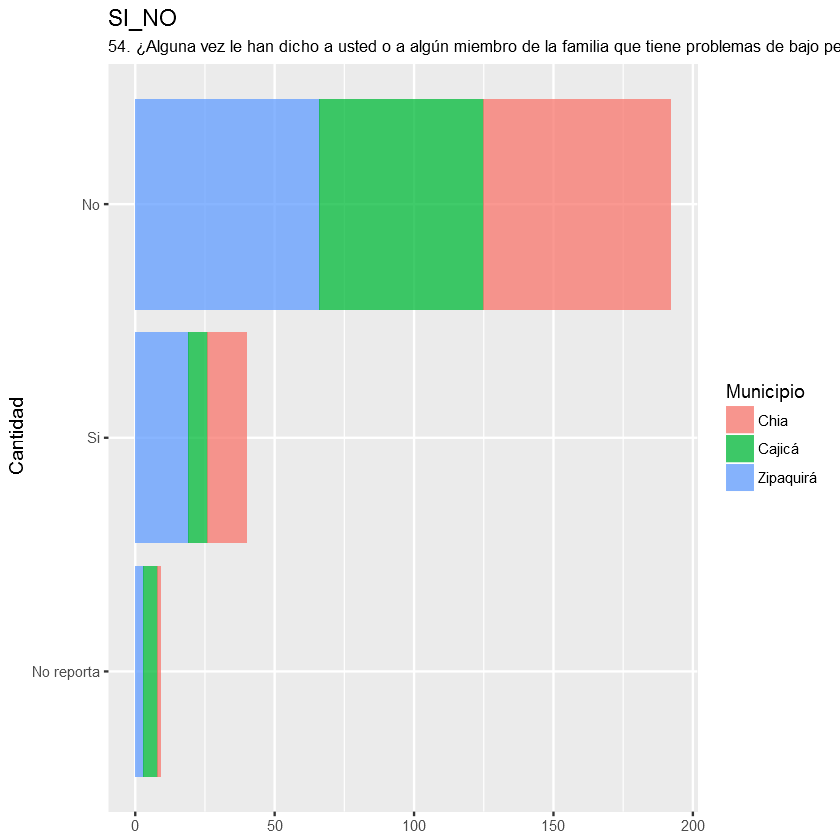

[1] "SEGURIDAD CIUDADANA 58. ¿Considera que algún miembro de su familia tiene el riesgo de convertirse en delincuente? SI_NO Variable 271"
           No reporta   Si    No
No reporta       0.00 0.00  0.00
Chia            13.69 1.24 19.09
Cajicá           0.00 1.24 28.22
Zipaquirá       21.58 0.41 14.52
                35.27 2.89 61.83


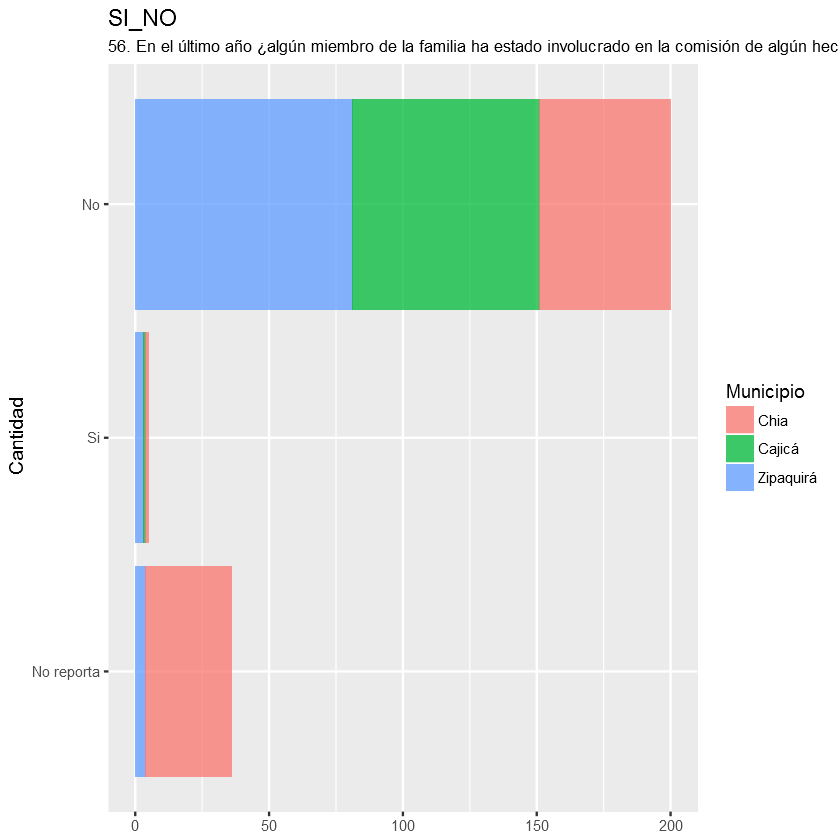

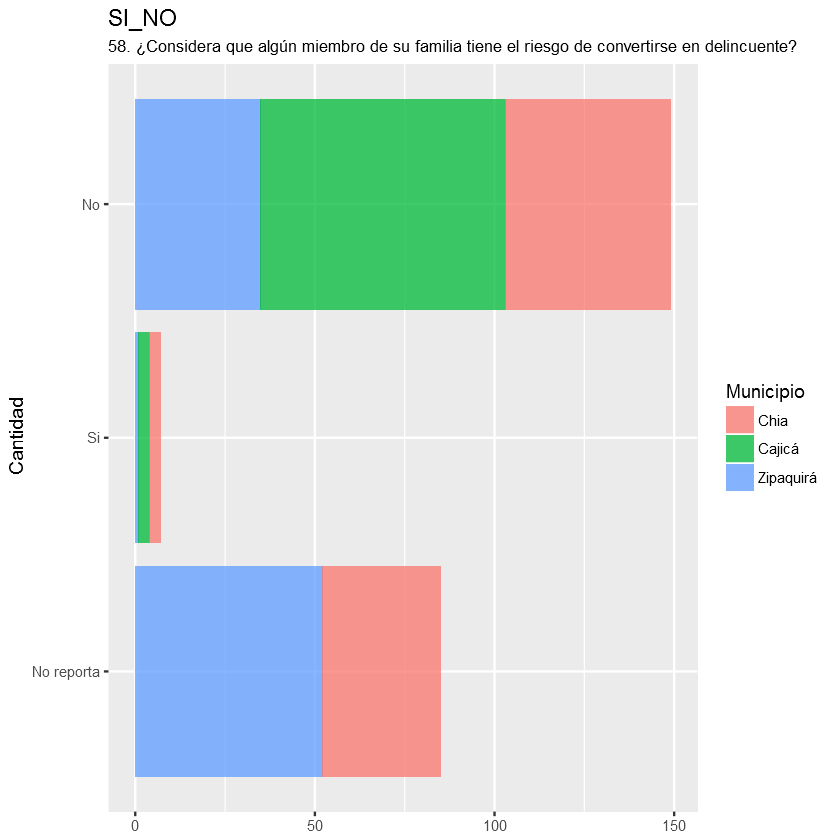

In [7]:
nm <- names(data)
for (i in seq_along(nm)) {
    if (vars_estudiar$Relevancia[i]==1){
        if (estruct$tipo_var[i]=="Numeric"){
            print(paste(vars_estudiar$Componente[i],vars_estudiar$Escala[i],vars_estudiar$React[i],"Variable",vars_estudiar$var[i]))
            print (summary(data[,i]))
            print(
                ggplot(data,aes_string(x = nm[i]))+
                  geom_histogram(alpha = .75,aes(fill = factor(X2)))+
                  guides(fill=guide_legend(title="Municipio"))+
                  theme(axis.title.x=element_blank())+
                  theme(axis.title.y=element_blank())+
                  #coord_flip()+
                  labs(title=estruct$React[i], subtitle=estruct$Escala[i])
            )
#                   ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
        }else{
            proporciones=round(100*(prop.table(table(data$X2,data[,i]))),2)
            #proporciones=cbind(proporciones,margin.table(proporciones,1))
            proporciones=rbind(proporciones,margin.table(proporciones,2))
            proporciones[proporciones=="NaN"]=0
            print(paste(vars_estudiar$Componente[i],vars_estudiar$Escala[i],vars_estudiar$React[i],"Variable",vars_estudiar$var[i]))
            print(proporciones)
            write.csv2(proporciones, file=paste(colnames(data)[i],".csv"))
            print(
                ggplot(data,aes_string(x = nm[i]))+
                  geom_bar(stat="count",alpha = .75,aes(fill = factor(X2)))+
                  guides(fill=guide_legend(title="Municipio"))+
                  theme(axis.title.x=element_blank())+
                  xlab("Cantidad")+
                  #theme(axis.title.y=element_blank())+
                  coord_flip()+
                  labs(title=estruct$React[i], subtitle=estruct$Escala[i])
            )
#                   ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
        }
        }
  }  

Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.Warning message:
In var(x): Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplica

[1]  241 1806

png 
  2

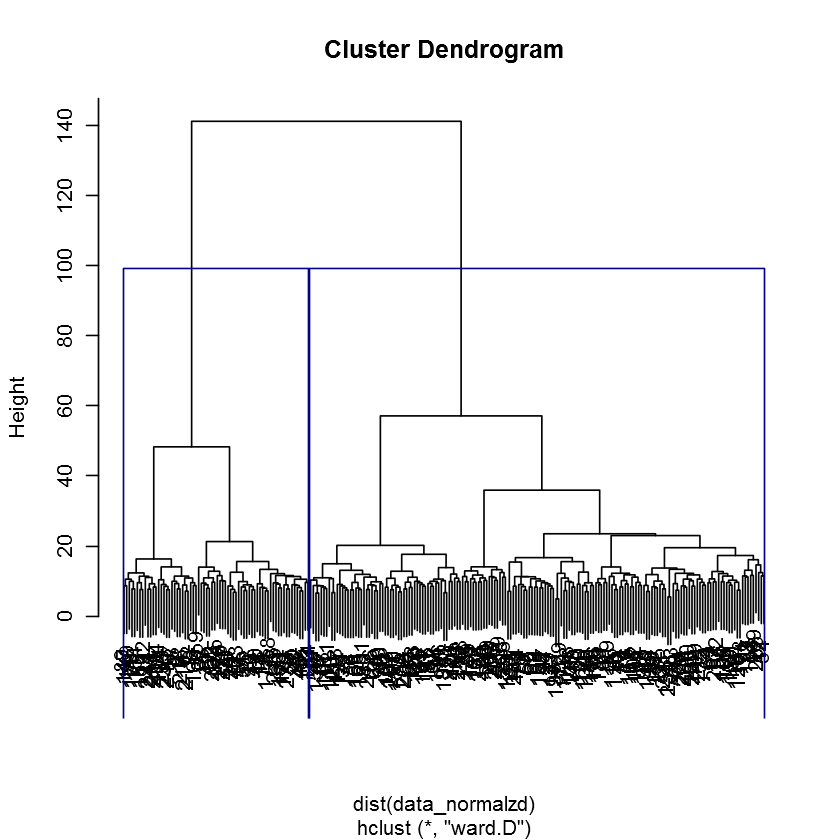

In [8]:
data_normalzd=NULL
for (i in 1:ncol(data)){
    x=data_raw[,i]
        if (estruct$tipo_var[i]=="Numeric"&var(x)>0){
#             print(i)
            normin_max = (x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))
            data_normalzd=cbind(data_normalzd,normin_max)
        }else{
            if(var(x)>0){
#             print(i)
            to_dummys=model.matrix(~factor(data_raw[,i])-1)
            data_normalzd=cbind(data_normalzd,to_dummys)
            }
        }
        }

dim(data_normalzd)
dend_data_normalzd=hclust(dist(data_normalzd),method="ward.D")
k_groups=2
jpeg(file = "dendrograma.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(dend_data_normalzd)#,horiz=T)#,hang=-1)
#groups<- factor(cutree(dend_data_normalzd, k=k_groups) )
rect.hclust(dend_data_normalzd, k=k_groups, border="darkblue") 
dev.off()
plot(dend_data_normalzd)#,horiz=T)#,hang=-1)
rect.hclust(dend_data_normalzd, k=k_groups, border="darkblue") 

In [9]:
#dend_reacts=hclust(dist(t(data)),method="ward.D")

#jpeg(file = "dendrograma.jpeg",width = 640, height = 640, units = "px", quality = 95)
#plot(dend_reacts)#,hang=-1)
#groups<- factor(cutree(dend_test4, k=k_groups) )
#rect.hclust(dend_test4, k=k_groups, border="darkblue") 
#dev.off()

## Tablas de frecuencia

In [10]:
agrupar_tablas=(unique(vars_estudiar$grups_vars))[-1]
for (group in agrupar_tablas){
    tbl=data[,vars_estudiar$grups_vars==group]
    vars_info=vars_estudiar[vars_estudiar$grups_vars==group,]
    colnames(tbl)=vars_estudiar$React[vars_estudiar$grups_vars==group]
    #print(head(tbl))
    #print(ggplot(datm,aes(x = variable, y = value,fill = ind)) + 
    #geom_bar(position = "fill",stat = "identity") + 
    #scale_y_continuous(labels = percent_format()))
}
head(tbl)
#agrupar_tablas

,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted.1,Quién_de_la_familia.1,HIJO_A_U_OTRO_MIEMBRO.1,...,Desde cuando (años) familiar,Severidad usted,Severidad familar,Usted,Quién_de_la_familia,HIJO_A_U_OTRO_MIEMBRO,Desde cuando (años) usted,Desde cuando (años) familiar.1,Severidad usted.1,Severidad familar.1
1,Nunca,Esposos-pareja,Nunca,0,0,0,0,Nunca,Esposos-pareja,Nunca,...,0,0,0,Nunca,Esposos-pareja,Nunca,0,0,0,0
2,Rara vez,Esposos-pareja,No reporta,0,0,0,0,Nunca,NA,No reporta,...,0,0,0,Rara vez,NA,No reporta,0,0,1,0
3,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Rara vez,NA,Nunca,0,0,1,0
4,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
5,Rara vez,NA,Nunca,0,0,1,0,Rara vez,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0
6,Nunca,NA,Nunca,0,0,0,0,Nunca,NA,Nunca,...,0,0,0,Nunca,NA,Nunca,0,0,0,0


### Acceso a servicios

In [44]:
props=NULL
for(i in 20:27){
    props=cbind(props,table(data[,i]))
}
colnames(props)=vars_estudiar$React[20:27]
prop_services=melt(prop.table(props,margin = 2))
colnames(prop_services)=c("Acceso","Servicio","Proporción")
proporc_servicios=round(prop.table(props,margin = 2),digits = 2)
proporc_servicios
write.csv2(proporc_servicios, file="proporc_servicios.csv")

,Luz,Agua_potable_domiciliaria,Teléfono_Local,Alcantarillado,Gas,Internet,Baño_domiciliario,Saneamiento_público
No,0.01,0.02,0.70,0.09,0.16,0.64,0.18,0.27
Si,0.99,0.98,0.30,0.91,0.84,0.36,0.82,0.73


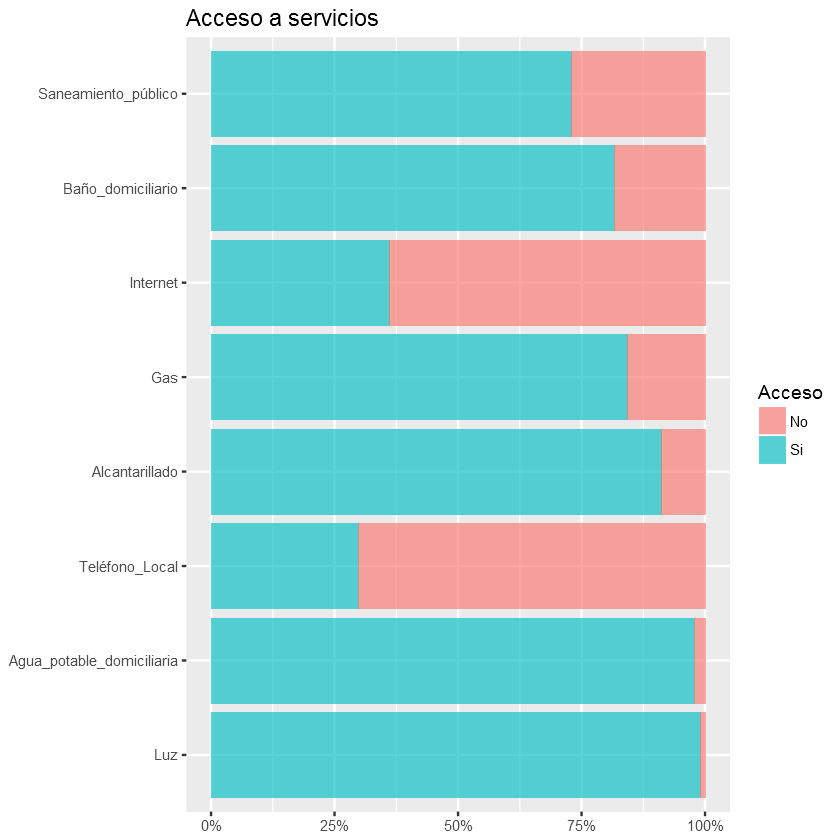

In [12]:
ggplot(prop_services,aes(x = Servicio, y=Proporción,fill=Acceso))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Acceso a servicios")+
coord_flip()
ggsave("Acceso a servicios.jpeg", width = size_pic_w, height = size_pic_h)

## Reciben ingresos

[1] reciben ingresos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Fuente,Promedio
1,No_mujeres_mayor_18_con_ingresos,0.676348547717842
2,No_hombres_con_ingresos,0.788381742738589
3,No_adolescentes_mayor_12_años_con_ingresos,0.004149377593361
9,No_niños_o_niñas_menor_12_años_con_ingresos_Tr_Padres,0.004149377593361


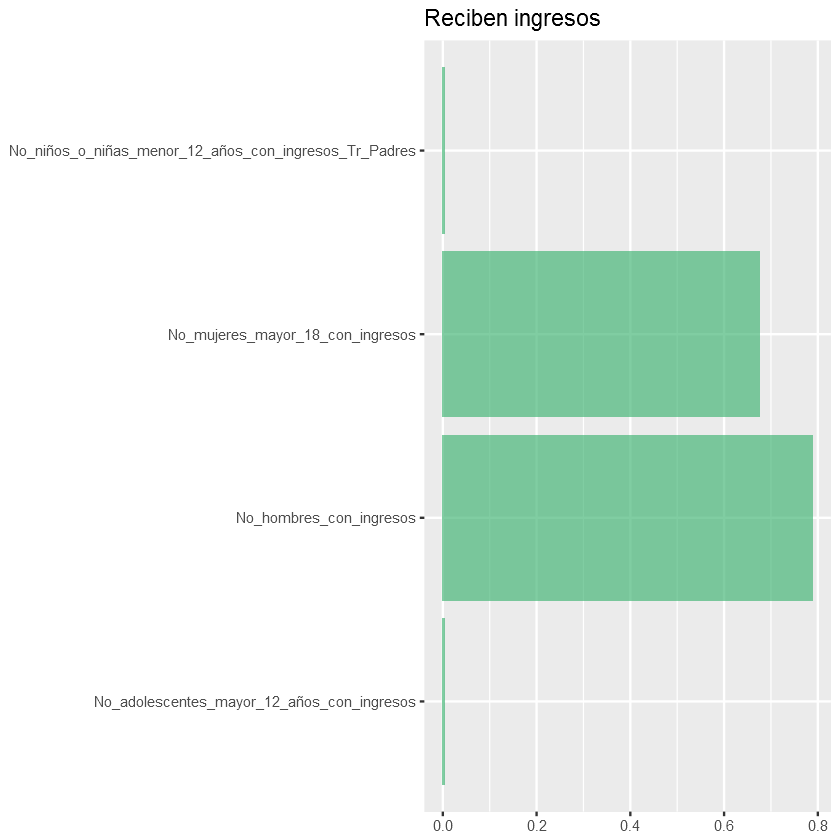

In [45]:
indx=2
agrupar_tablas[indx]
dtbl_ingr=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_ingr)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_ingr=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]

ingrss_prom=data.frame(colMeans(dtbl_ingr))
colnames(ingrss_prom)="Promedio"
ingrss_prom=data.frame(Fuente=rownames(ingrss_prom),Promedio=ingrss_prom$Promedio)
ingrss_prom=ingrss_prom[ingrss_prom$Promedio>0,]
ingrss_prom
write.csv2(ingrss_prom,file="ingrss_prom.csv")

ggplot(ingrss_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Reciben ingresos")
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Razones comisaría

[1] razones comisaria
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Violencia_intrafamiliar_,Cuotas_alimentarias,Abuso_sexual_niños,Drogas_Alcohol,Desobediencia,Bullyng o mtoneo,Otros_
No,0.9792531,0.9502075,0.9917012,0.9958506,0.9958506,0.9958506,0.9875519
Si,0.020746888,0.049792531,0.008298755,0.004149378,0.004149378,0.004149378,0.012448133


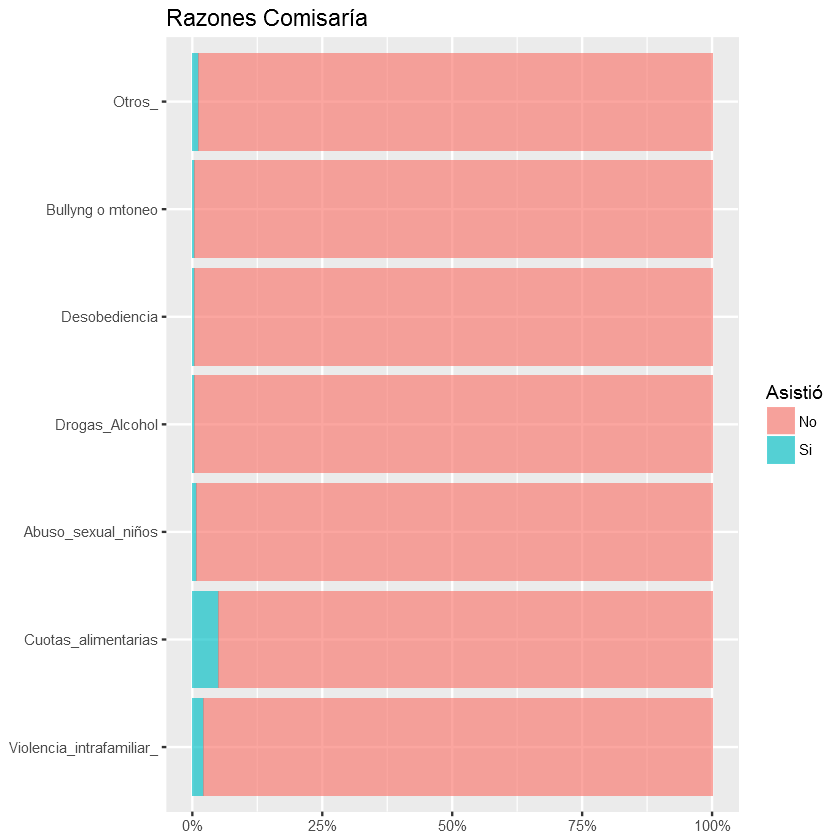

In [46]:
indx=3
agrupar_tablas[indx]

dtbl_cmsr=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cmsr)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cmsr=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#dtbl_cmsr$Otros_=NULL

props_cmsr=NULL
for(i in 1:ncol(dtbl_cmsr)){
    props_cmsr=cbind(props_cmsr,table(dtbl_cmsr[,i]))
}
colnames(props_cmsr)=colnames(dtbl_cmsr)
asist_comisaria=prop.table(props_cmsr,2)
write.csv2(asist_comisaria, file="asist_comisaria.csv")
asist_comisaria
prop_cmsr=melt(prop.table(props_cmsr,margin = 2))
colnames(prop_cmsr)=c("Asistió","Motivo","Proporción")

ggplot(prop_cmsr,aes(x = Motivo, y=Proporción,fill=Asistió))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Razones Comisaría")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Razones Policía

[1] razones policía
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Violencia_intrafamiliar_,Riñas,Robos,Drogas_Alcohol,Problemas_vecinos
No,0.9875519,0.9958506,0.9792531,0.9917012,0.9875519
Si,0.012448133,0.004149378,0.020746888,0.008298755,0.012448133


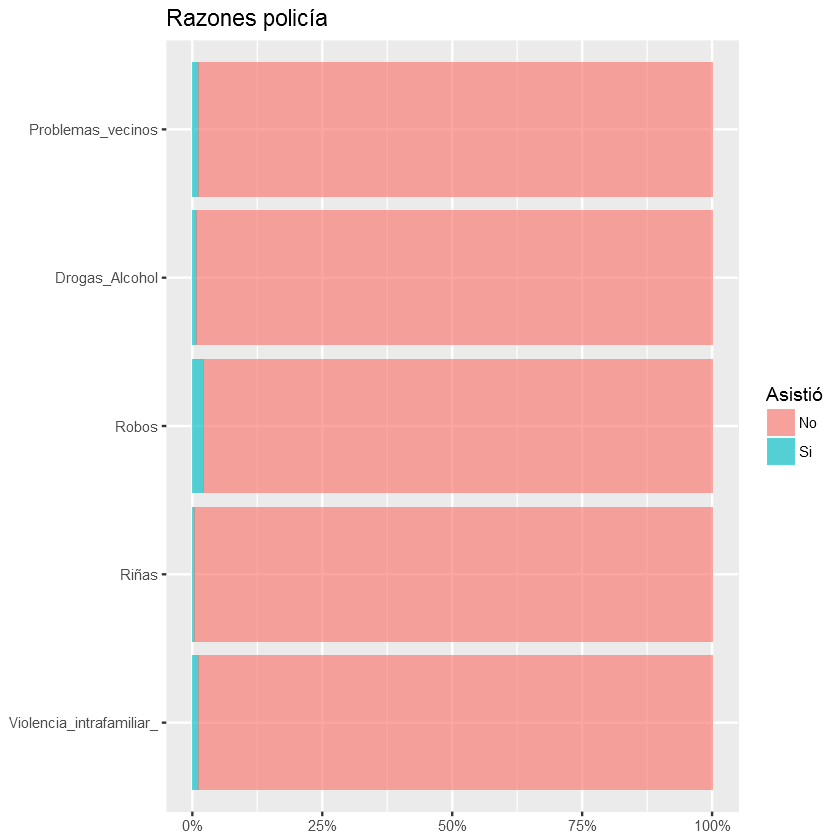

In [47]:
indx=4
agrupar_tablas[indx]

dtbl_polic=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_polic)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_polic=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_polic)

props_polic=NULL
for(i in 1:ncol(dtbl_polic)){
    props_polic=cbind(props_polic,table(dtbl_polic[,i]))
}
colnames(props_polic)=colnames(dtbl_polic)
asist_polic=prop.table(props_polic,2)
asist_polic
write.csv2(asist_polic,file="asist_polic.csv")
prop_polic=melt(prop.table(props_polic,margin = 2))
#prop_polic
colnames(prop_polic)=c("Asistió","Motivo","Proporción")

ggplot(prop_polic,aes(x = Motivo, y=Proporción,fill=Asistió))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Razones policía")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Involucrado en delitos

[1] involucrado en delitos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Pandillas,Barras_bravas,Robos,Vandalismo,Drogas,Alcohol,Prostitución,Sectas,Juego,Abuso_sexual,Otro
No,1.0000000,1.0000000,1.0000000,1.0000000,0.9875519,1.0000000,1.0000000,1.0000000,1.0000000,0.9917012,0.5000000
Si,0.000000000,0.000000000,0.000000000,0.000000000,0.012448133,0.000000000,0.000000000,0.000000000,0.000000000,0.008298755,0.500000000


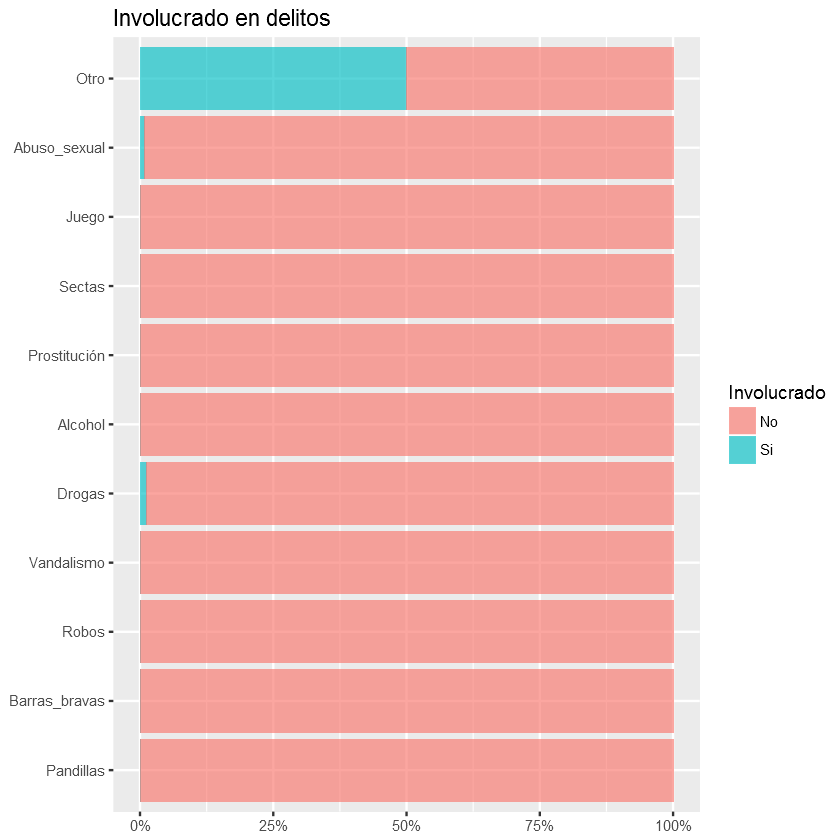

In [48]:
indx=5
agrupar_tablas[indx]
# agrupar_tablas

dtbl_delits=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_delits)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_delits=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_delits)

props_delits=NULL
for(i in 1:ncol(dtbl_delits)){
    props_delits=cbind(props_delits,table(dtbl_delits[,i]))
}
colnames(props_delits)=colnames(dtbl_delits)
invest_fiscalia=prop.table(props_delits,2)
invest_fiscalia
write.csv2(invest_fiscalia,file="invest_fiscalia.csv")
prop_delits=melt(prop.table(props_delits,margin = 2))
#prop_delits
colnames(prop_delits)=c("Involucrado","Delito","Proporción")

ggplot(prop_delits,aes(x = Delito, y=Proporción,fill=Involucrado))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Involucrado en delitos")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Promedio de gastos

[1] Promedio de gastos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Fuente,Promedio
6,Mercado_hogar_carnes_lácteos_etc_,271533.609958506
1,Arriendo,239792.531120332
3,Servicios_públicos_agua_luz_etc_,129523.319502075
13,Préstamos_bancarios_,102807.468879668
11,Vestuario_zapatos_ropa_familia_,101058.091286307
8,Educación_jardines_y_cuidador_hijo_,95684.6473029046
10,Transporte_personal_,53831.5352697095
5,Actividades_culturales_y_o_de_esparcimiento_grupo_familiar_,47551.867219917
7,Salud_,35524.6887966805
2,Cuota_vivienda,27917.0124481328


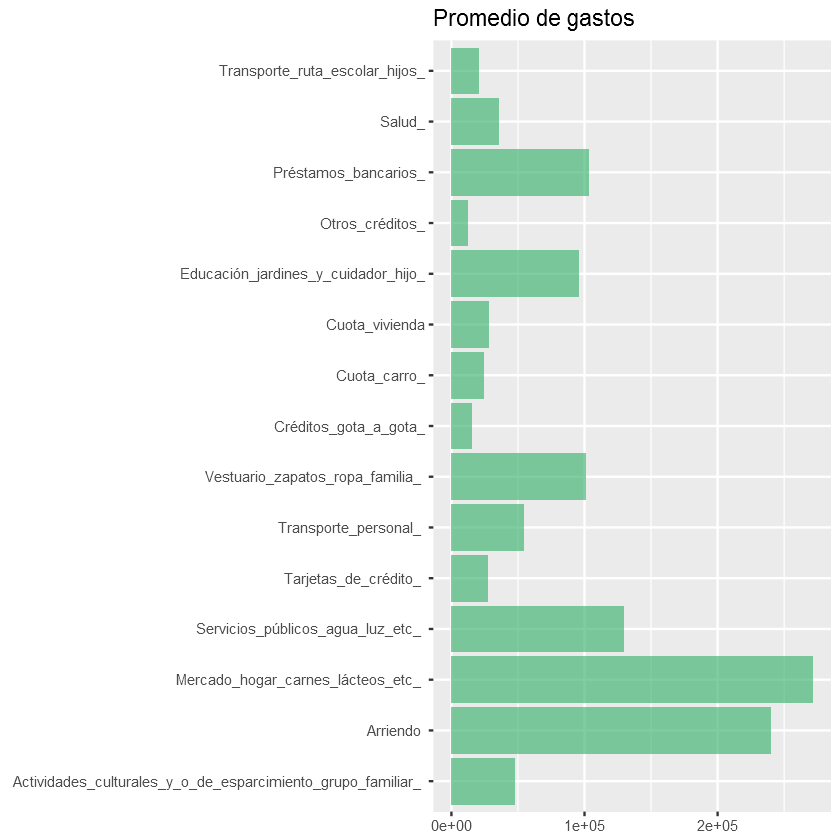

In [49]:
indx=6
agrupar_tablas[indx]

dtbl_gasts=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
#dtbl_gasts/data$X46#Ingresos declarados
colnames(dtbl_gasts)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_gasts=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]

gastsss_prom=data.frame(colMeans(dtbl_gasts))
colnames(gastsss_prom)="Promedio"
gastsss_prom=data.frame(Fuente=rownames(gastsss_prom),Promedio=gastsss_prom$Promedio)
gastsss_prom=gastsss_prom[order(-gastsss_prom$Promedio),]
write.csv2(gastsss_prom,file="gastsss_prom.csv")
gastsss_prom

ggplot(gastsss_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de gastos")
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Enfermedad

In [18]:
indx=7
agrupar_tablas[indx]

[1] Episodios enfermedad
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

[1] Episodios enfermedad
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Diarrea,Gripa,Vómito,Eruptivas,Problemas_de_piel,Alergias,Desnutrición,Infecciones,Fracturas,Golpes,Heridas_graves,Otra
No,0.8912134,0.7149123,0.9205021,0.9958506,0.9583333,0.9583333,0.9875519,0.9792531,0.9958506,0.9831933,0.9958506,0.9751037
Si,0.108786611,0.285087719,0.079497908,0.004149378,0.041666667,0.041666667,0.012448133,0.020746888,0.004149378,0.016806723,0.004149378,0.024896266


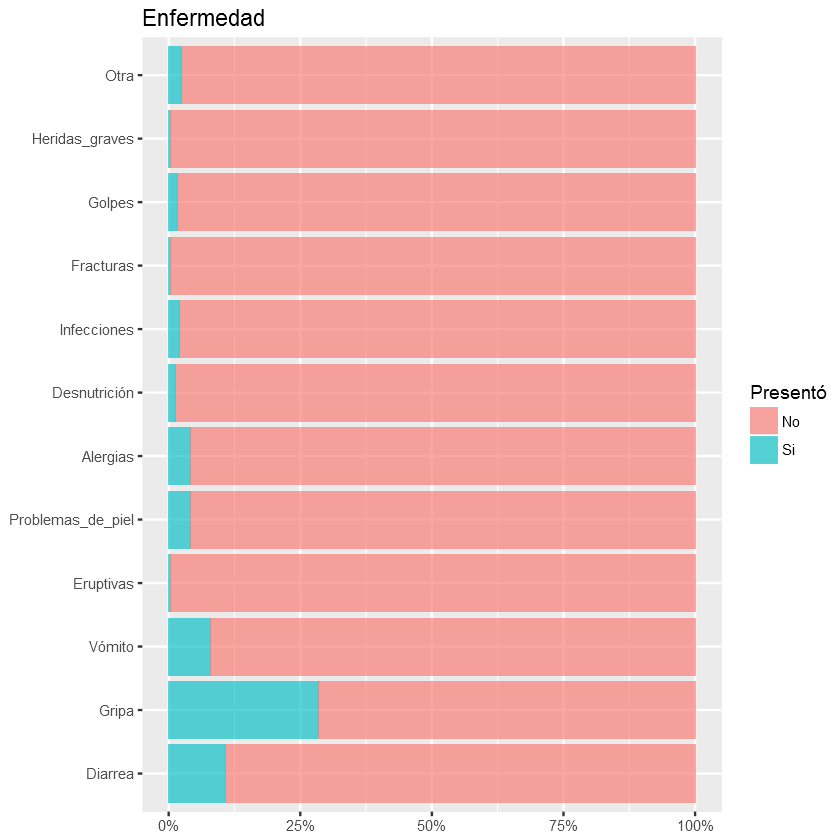

In [50]:
indx=7
agrupar_tablas[indx]

dtbl_enferm=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_enferm)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_enferm=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_enferm)

props_enferm=NULL
for(i in 1:ncol(dtbl_enferm)){
    props_enferm=cbind(props_enferm,table(dtbl_enferm[,i]))
}
colnames(props_enferm)=colnames(dtbl_enferm)
report_enfermed=prop.table(props_enferm,2)
write.csv2(report_enfermed,file="report_enfermed.csv")
report_enfermed
prop_enferm=melt(prop.table(props_enferm,margin = 2))
colnames(prop_enferm)=c("Presentó","Enfermedad","Proporción")
#prop_enferm

ggplot(prop_enferm,aes(x = Enfermedad, y=Proporción,fill=Presentó))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Enfermedad")+
coord_flip()
ggsave(paste(agrupar_tablas[indx],".jpeg"), width = size_pic_w, height = size_pic_h)

## Cigarrillo y bebidas

In [20]:
indx=8
agrupar_tablas[indx]

[1] consumo cigarrillo-bebidas
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

[1] consumo cigarrillo-bebidas
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

,Fuma,Bebid_alch
No reporta,0.01244813,0.01659751
Si,0.09128631,0.19502075
No,0.8962656,0.7883817


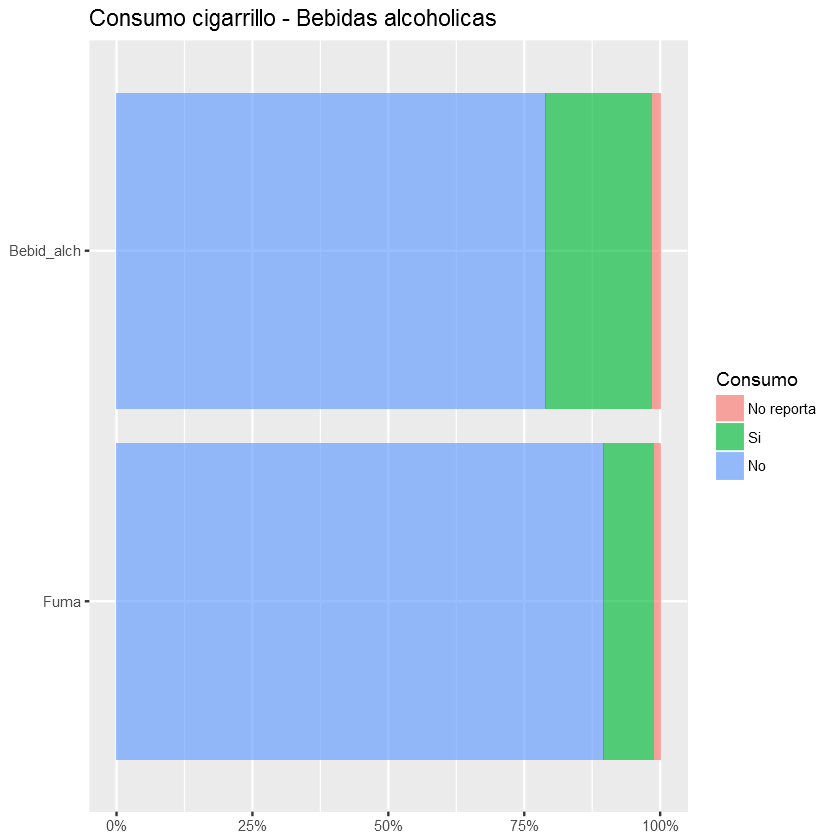

In [51]:
indx=8
agrupar_tablas[indx]

dtbl_cig_beb=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cig_beb)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cig_beb=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_cig_beb)

cig_beb_cons=data.frame(Fuma=dtbl_cig_beb[,1],Bebid_alch=dtbl_cig_beb[,3])
#head(cig_beb_cons)

props_cig_beb_cons=NULL
for(i in 1:ncol(cig_beb_cons)){
    props_cig_beb_cons=cbind(props_cig_beb_cons,table(cig_beb_cons[,i]))
}
colnames(props_cig_beb_cons)=colnames(cig_beb_cons)
consumo_cig_beb=prop.table(props_cig_beb_cons,2)
write.csv2(consumo_cig_beb,file="consumo_cig_beb.csv")
consumo_cig_beb
prop_cig_beb_cons=melt(prop.table(props_cig_beb_cons,margin = 2))
colnames(prop_cig_beb_cons)=c("Consumo","Tipo","Proporción")
#prop_cig_beb_cons

ggplot(prop_cig_beb_cons,aes(x = Tipo, y=Proporción,fill=Consumo))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo cigarrillo - Bebidas alcoholicas")+
coord_flip()
ggsave(paste("Consumo cigarrillo - Bebidas alcoholicas",".jpeg"), width = size_pic_w, height = size_pic_h)

,Consumo,Promedio
1,Fuma,2.66666666666667
2,Alcohol,1.8695652173913


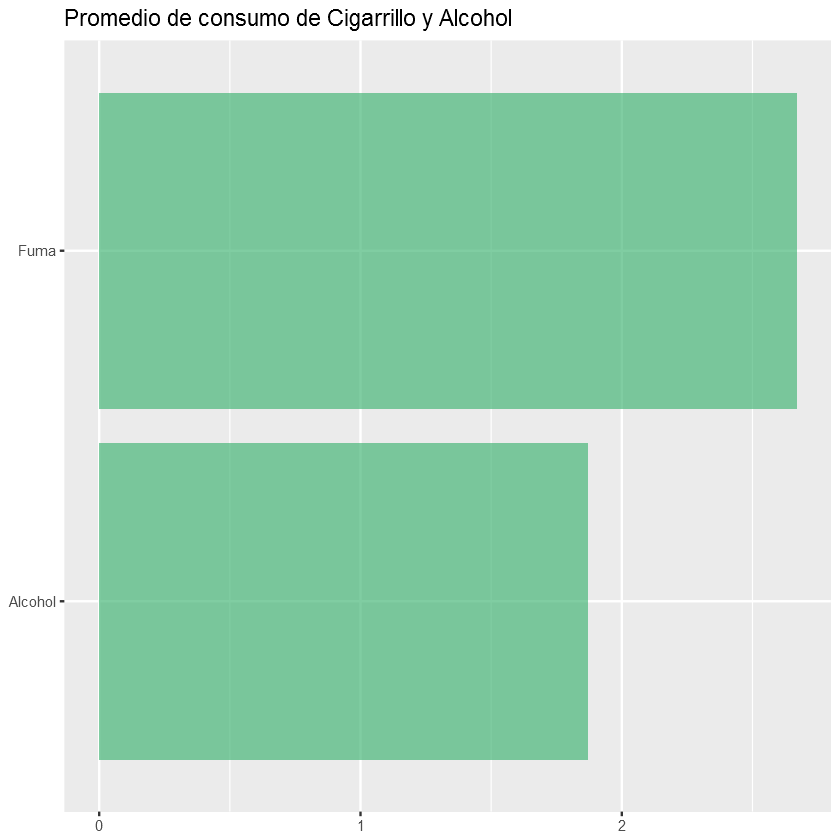

In [22]:
Fuma_freq=dtbl_cig_beb[dtbl_cig_beb[,1]=="Si",2]
Bebid_alch_freq=dtbl_cig_beb[dtbl_cig_beb[,3]=="Si",4]
fum_alch_prom=data.frame(Consumo=c("Fuma","Alcohol"),Promedio=c(mean(Fuma_freq[Fuma_freq>0]),mean(Bebid_alch_freq[Bebid_alch_freq>0])))
fum_alch_prom

ggplot(fum_alch_prom,aes(x=Consumo,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de consumo de Cigarrillo y Alcohol")
ggsave(paste("Promedio de consumo de Cigarrillo y Alcohol",".jpeg"), width = size_pic_w, height = size_pic_h)

## Origen alimentos

In [23]:
indx=9
agrupar_tablas[indx]

[1] tabla consolidada -origen alimentos- con frecuencias y porcentajes
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [24]:
dtbl_orig_alim=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_orig_alim)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_orig_alim=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_orig_alim)

,Producción,Compra,Donación,Trueque,Sobras
No reporta,0.19917012,0.02904564,0.19087137,0.21576763,0.21161826
Mayor parte,0.161825726,0.813278008,0.041493776,0.012448133,0.004149378
Pequeña parte,0.08713693,0.09543568,0.06639004,0.04564315,0.01244813
Nada,0.55186722,0.06224066,0.70124481,0.72614108,0.77178423


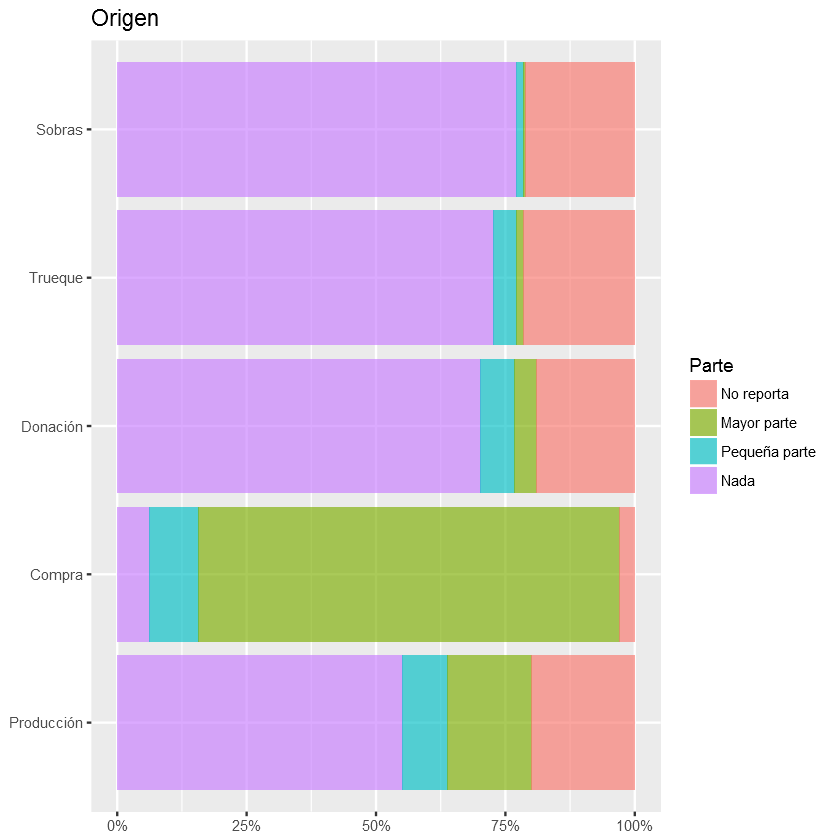

In [25]:
props_orig_alim=NULL
for(i in 1:ncol(dtbl_orig_alim)){
    props_orig_alim=cbind(props_orig_alim,table(dtbl_orig_alim[,i]))
}
colnames(props_orig_alim)=colnames(dtbl_orig_alim)
prop.table(props_orig_alim,2)
prop_orig_alim=melt(prop.table(props_orig_alim,margin = 2))
colnames(prop_orig_alim)=c("Parte","Origen","Proporción")
# prop_orig_alim

ggplot(prop_orig_alim,aes(x = Origen, y=Proporción,fill=Parte))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Origen")+
coord_flip()
ggsave(paste("Origen alimentos",".jpeg"), width = size_pic_w, height = size_pic_h)

## Frecuencia consumo alimentos

In [26]:
indx=10
agrupar_tablas[indx]

[1] tabla consolidada -frecuencia consumo alimentos - con frecuencias y porcentajes
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [27]:
dtbl_cons_alim=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_cons_alim)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_cons_alim=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_cons_alim)

,Cereales,Harinas,Lacteos,Panela,Huevo,Carnes,Leguminosas,Hortalizas verduras,Frutas,Otros
No reporta,0.037344398,0.029045643,0.020746888,0.029045643,0.004149378,0.012448133,0.074688797,0.029045643,0.029045643,0.585062241
Diaria,0.7261411,0.7800830,0.6431535,0.5809129,0.5145228,0.4439834,0.3983402,0.4356846,0.4066390,0.1369295
Semanal,0.15767635,0.17012448,0.25726141,0.28215768,0.43568465,0.43153527,0.44398340,0.43983402,0.41078838,0.09958506
Mensual,0.07883817,0.02074689,0.07883817,0.10788382,0.04564315,0.11203320,0.08298755,0.09543568,0.15352697,0.17842324


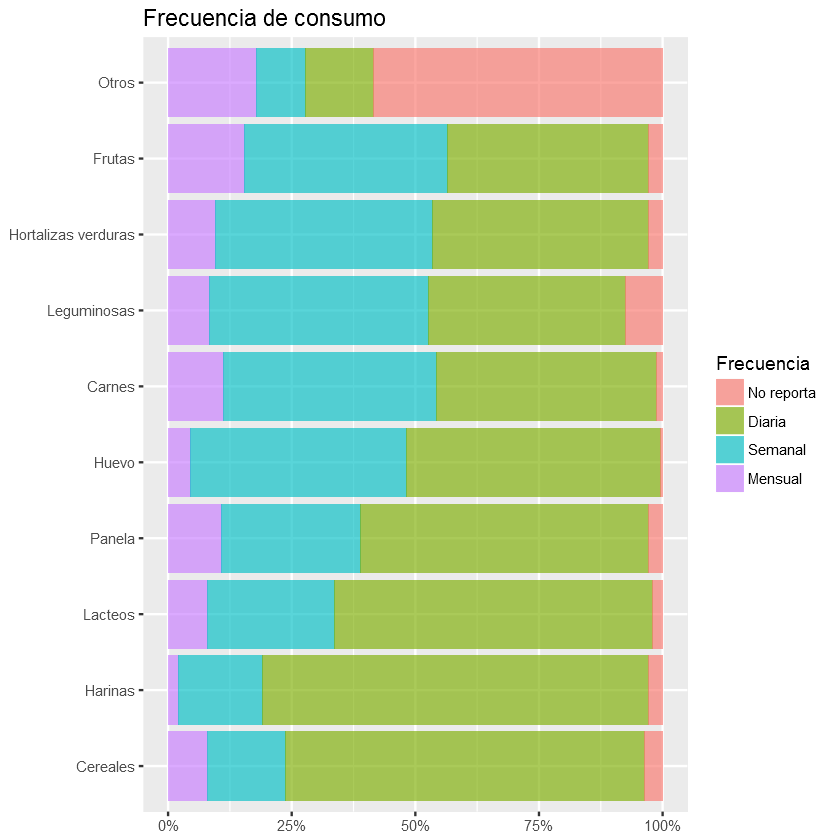

In [28]:
props_cons_alim=NULL
for(i in 1:ncol(dtbl_cons_alim)){
    props_cons_alim=cbind(props_cons_alim,table(dtbl_cons_alim[,i]))
}
colnames(props_cons_alim)=colnames(dtbl_cons_alim)
prop.table(props_cons_alim,2)
prop_cons_alim=melt(prop.table(props_cons_alim,margin = 2))
colnames(prop_cons_alim)=c("Frecuencia","Alimento","Proporción")
#prop_cons_alim

ggplot(prop_cons_alim,aes(x = Alimento, y=Proporción,fill=Frecuencia))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Frecuencia de consumo")+
coord_flip()
ggsave(paste("frecuencia consumo",".jpeg"), width = size_pic_w, height = size_pic_h)

## Delitos

In [29]:
indx=11
agrupar_tablas[indx]

[1] Tabla delitos
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [30]:
dtbl_delits=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_delits)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_info_delits=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_delits)


,Fuente,Promedio
11,Bullying o matoneo,0.298755186721992
1,Robo residencia,0.161825726141079
4,Cosquilleo,0.145228215767635
2,Atraco arma blanca,0.141078838174274
10,Calumnias e injurias,0.141078838174274
5,Amenazas,0.120331950207469
8,Agresión física,0.120331950207469
15,Estafa,0.04149377593361
6,Robo vehículo,0.024896265560166
7,Violación,0.024896265560166


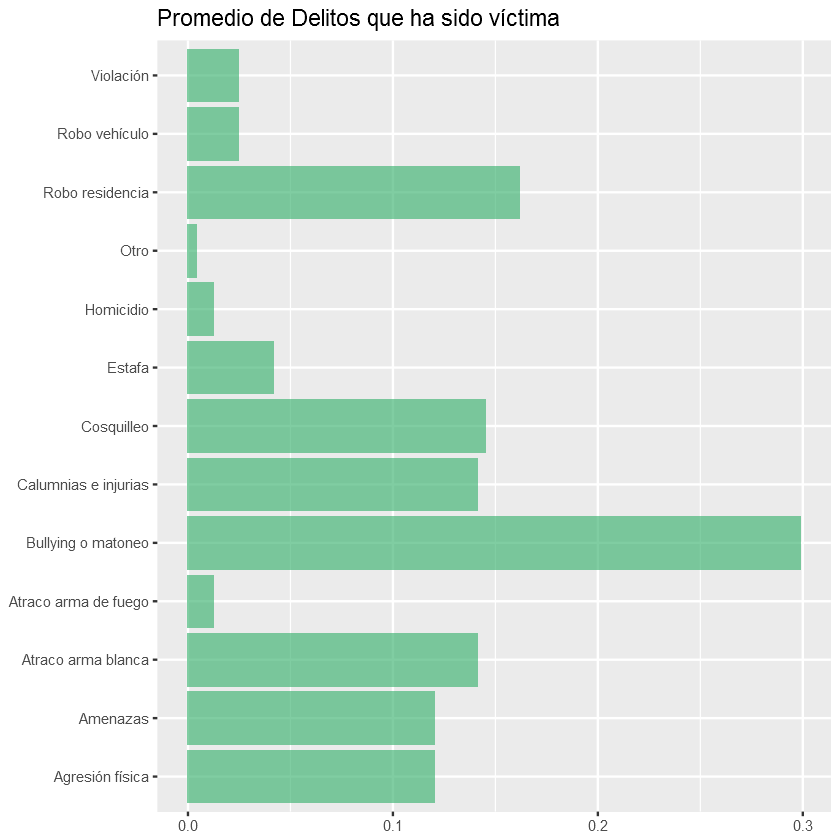

In [31]:
num_veces_df=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[1]]
colnames(num_veces_df)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[1]]

num_veces_prom=data.frame(colMeans(num_veces_df))
colnames(num_veces_prom)="Promedio"
num_vecess_prom=data.frame(Fuente=rownames(num_veces_prom),Promedio=num_veces_prom$Promedio)
num_vecess_prom=num_vecess_prom[num_vecess_prom$Promedio>0,]
num_vecess_prom=num_vecess_prom[order(-num_vecess_prom$Promedio),]
num_vecess_prom

ggplot(num_vecess_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Promedio de Delitos que ha sido víctima")
ggsave(paste("Promedio de Delitos que ha sido víctima",".jpeg"), width = size_pic_w, height = size_pic_h)

,Robo residencia,Atraco arma blanca,Atraco arma de fuego,Cosquilleo,Amenazas,Robo vehículo,Violación,Agresión física,Calumnias e injurias,Bullying o matoneo,Homicidio,Estafa,Otro
Esposos-pareja,0.1111111,0.0000000,0.0000000,0.0000000,0.1538462,0.2000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Hijos,0.11111111,0.20833333,0.33333333,0.19047619,0.07692308,0.20000000,0.50000000,0.11111111,0.08333333,0.50000000,1.00000000,0.00000000,0.00000000
Padres,0.07407407,0.12500000,0.00000000,0.23809524,0.15384615,0.20000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.12500000,0.00000000
Nietos,0.03703704,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.25000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Cuñados,0.00000000,0.04166667,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Primos,0.03703704,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.25000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Hermanos,0.07407407,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.08333333,0.00000000,0.00000000,0.00000000,0.00000000
encuestado,0.3703704,0.6250000,0.6666667,0.5714286,0.5384615,0.4000000,0.0000000,0.6666667,0.7500000,0.3333333,0.0000000,0.7500000,0.0000000
Núcleo familiar,0.18518519,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11111111,0.08333333,0.16666667,0.00000000,0.12500000,1.00000000
Ex - esposo,0.00000000,0.00000000,0.00000000,0.00000000,0.07692308,0.00000000,0.00000000,0.11111111,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


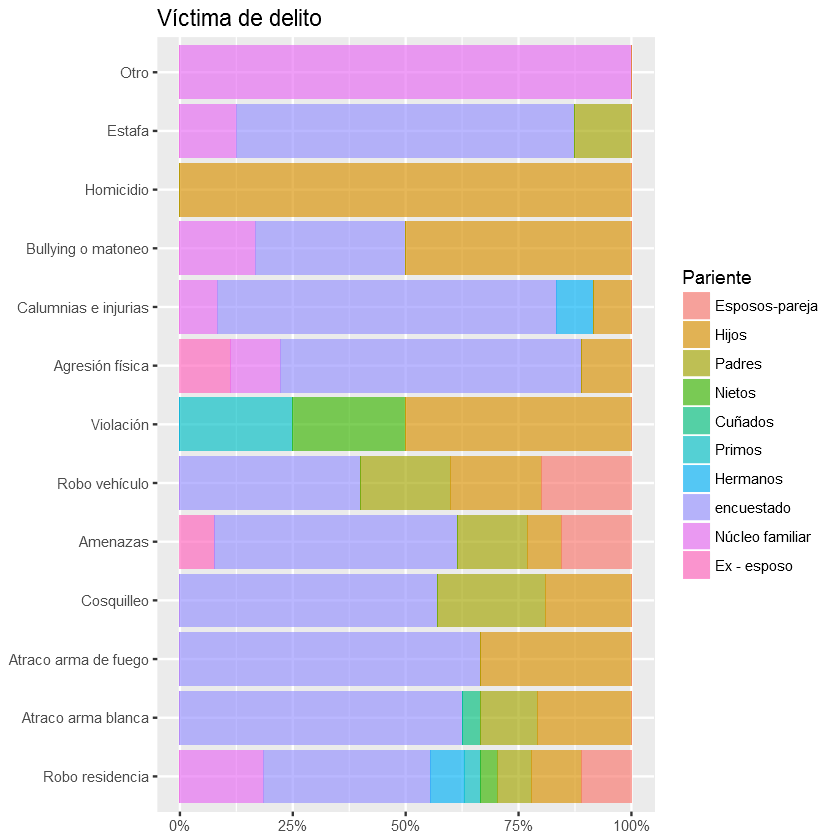

In [32]:
qn_fmlia=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[2]]
colnames(qn_fmlia)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[2]]

props_qn_fmlia=NULL
for(i in 1:ncol(qn_fmlia)){
    props_qn_fmlia=cbind(props_qn_fmlia,table(qn_fmlia[,i]))
}
colnames(props_qn_fmlia)=colnames(qn_fmlia)
props_qn_fmlia=props_qn_fmlia[rowSums(props_qn_fmlia)>0,]
props_qn_fmlia=props_qn_fmlia[,colSums(props_qn_fmlia)>0]
prop.table(props_qn_fmlia,2)
prop_qn_fmlia=melt(prop.table(props_qn_fmlia,margin = 2))
colnames(prop_qn_fmlia)=c("Pariente","Delito","Proporción")

ggplot(prop_qn_fmlia,aes(x = Delito, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Víctima de delito")+
coord_flip()
ggsave(paste("Víctima de delito",".jpeg"), width = size_pic_w, height = size_pic_h)

,Robo residencia,Atraco arma blanca,Atraco arma de fuego,Cosquilleo,Amenazas,Robo vehículo,Violación,Agresión física,Extorsión,Calumnias e injurias,Bullying o matoneo,Ataques de pandillas o barras bravas,Homicidio,Desaparición forzada,Estafa,Otro
Si,17,14,2,13,10,2,4,10,0,9,7,1,3,0,5,1
No,10,13,1,10,4,1,0,2,1,6,6,1,1,1,4,2


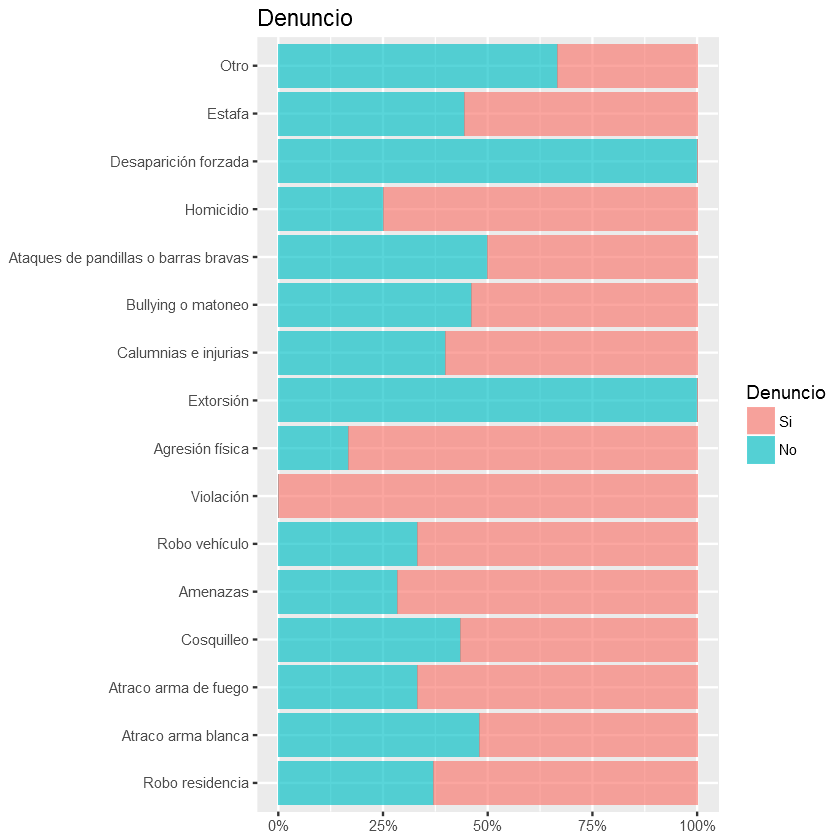

In [33]:
denuncio=dtbl_delits[,vars_info_delits$React==unique(vars_info_delits$React)[3]]
colnames(denuncio)=vars_info_delits$Escala[vars_info_delits$React==unique(vars_info_delits$React)[3]]

props_denuncio=NULL
for(i in 1:ncol(denuncio)){
    props_denuncio=cbind(props_denuncio,table(denuncio[,i]))
}
colnames(props_denuncio)=colnames(denuncio)
#props_denuncio=props_denuncio[rowSums(props_denuncio)>0,]
#props_denuncio=props_denuncio[,colSums(props_denuncio)>0]
props_denuncio[2:3,]
prop_denuncio=melt(prop.table(props_denuncio[2:3,],margin = 2))
colnames(prop_denuncio)=c("Denuncio","Delito","Proporción")


ggplot(prop_denuncio,aes(x = Delito, y=Proporción,fill=Denuncio))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Denuncio")+
coord_flip()
ggsave(paste("Denuncio",".jpeg"), width = size_pic_w, height = size_pic_h)

## Consumo SPA

In [34]:
indx=12
agrupar_tablas[indx]

[1] tabla SPA
13 Levels:  consumo cigarrillo-bebidas ... tabla SPA

In [35]:
dtbl_SPA=data[,vars_estudiar$grups_vars==agrupar_tablas[indx]]
colnames(dtbl_SPA)=vars_estudiar$React[vars_estudiar$grups_vars==agrupar_tablas[indx]]
vars_SPA=vars_estudiar[vars_estudiar$grups_vars==agrupar_tablas[indx],]
#head(dtbl_SPA,n = 15)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
No reporta,0.1452282,0.1742739,0.1701245,0.1742739,0.1784232,0.1742739,0.1742739,0.1742739,0.1742739,0.1742739,0.1742739
Nunca,0.5020747,0.6431535,0.8174274,0.8257261,0.8215768,0.8257261,0.8257261,0.8257261,0.8257261,0.8257261,0.7427386
Rara vez,0.232365145,0.128630705,0.008298755,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.029045643
A veces,0.103734440,0.053941909,0.004149378,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.029045643
Frecuente,0.01659751,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02489627


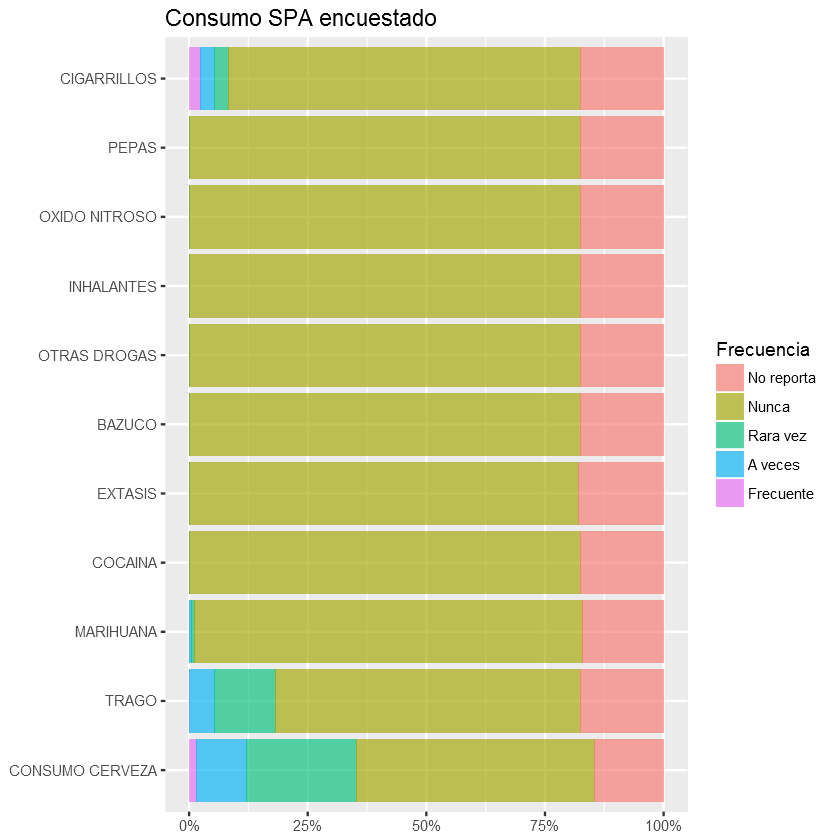

In [36]:
SPA_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[1]]
colnames(SPA_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[1]]
#head(SPA_encuestado)


props_SPA_encuestado=NULL
for(i in 1:ncol(SPA_encuestado)){
    props_SPA_encuestado=cbind(props_SPA_encuestado,table(SPA_encuestado[,i]))
}
colnames(props_SPA_encuestado)=colnames(SPA_encuestado)
props_SPA_encuestado=props_SPA_encuestado[rowSums(props_SPA_encuestado)>0,]
props_SPA_encuestado=props_SPA_encuestado[,colSums(props_SPA_encuestado)>0]
prop.table(props_SPA_encuestado,2)
prop_SPA_encuestado=melt(prop.table(props_SPA_encuestado,margin = 2))
colnames(prop_SPA_encuestado)=c("Frecuencia","Sustancia","Proporción")

ggplot(prop_SPA_encuestado,aes(x = Sustancia, y=Proporción,fill=Frecuencia))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo SPA encuestado")+
coord_flip()
ggsave(paste("Consumo SPA encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
Esposos-pareja,0.05714286,0.02857143,0.01904762,0.00952381,0.00952381,0.00952381,0.00952381,0.00952381,0.00952381,0.00952381,0.01904762
Hijos,0.02857143,0.00952381,0.01904762,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01904762
Padres,0.00952381,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01904762
Sobrinos,0.00952381,0.00952381,0.00952381,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Tios,0.01904762,0.01904762,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00952381
Hermanos,0.04761905,0.03809524,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02857143
Hijastros,0.00952381,0.00952381,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Otro familiar,0.20952381,0.19047619,0.02857143,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.06666667


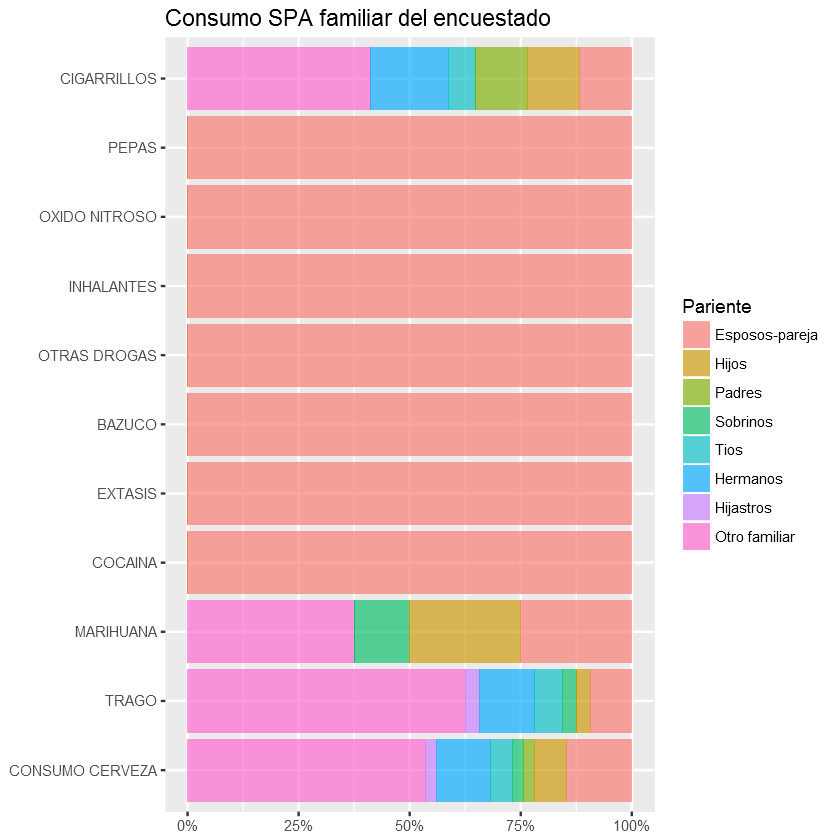

In [37]:
SPA_familiar=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[2]]
colnames(SPA_familiar)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[2]]
#head(SPA_familiar)

props_SPA_familiar=NULL
for(i in 1:ncol(SPA_familiar)){
    props_SPA_familiar=cbind(props_SPA_familiar,table(SPA_familiar[,i]))
}
colnames(props_SPA_familiar)=colnames(SPA_familiar)
props_SPA_familiar=props_SPA_familiar[rowSums(props_SPA_familiar)>0,]
props_SPA_familiar=props_SPA_familiar[,colSums(props_SPA_familiar)>0]
prop.table(props_SPA_familiar)
prop_SPA_familiar=melt(prop.table(props_SPA_familiar,margin = 2))
colnames(prop_SPA_familiar)=c("Pariente","Sustancia","Proporción")

ggplot(prop_SPA_familiar,aes(x = Sustancia, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Consumo SPA familiar del encuestado")+
coord_flip()
ggsave(paste("Consumo SPA familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,CONSUMO CERVEZA,TRAGO,MARIHUANA,COCAINA,EXTASIS,BAZUCO,OTRAS DROGAS,INHALANTES,OXIDO NITROSO,PEPAS,CIGARRILLOS
No reporta,0.2987552,0.2946058,0.2946058,0.2987552,0.3029046,0.2946058,0.3029046,0.2946058,0.3029046,0.3029046,0.2946058
Nunca,0.3858921,0.4813278,0.6680498,0.6970954,0.6970954,0.6929461,0.6970954,0.7012448,0.6970954,0.6970954,0.5684647
Rara vez,0.153526971,0.124481328,0.004149378,0.004149378,0.000000000,0.000000000,0.000000000,0.004149378,0.000000000,0.000000000,0.033195021
A veces,0.112033195,0.066390041,0.004149378,0.000000000,0.000000000,0.012448133,0.000000000,0.000000000,0.000000000,0.000000000,0.045643154
Frecuente,0.04979253,0.03319502,0.02904564,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.05809129


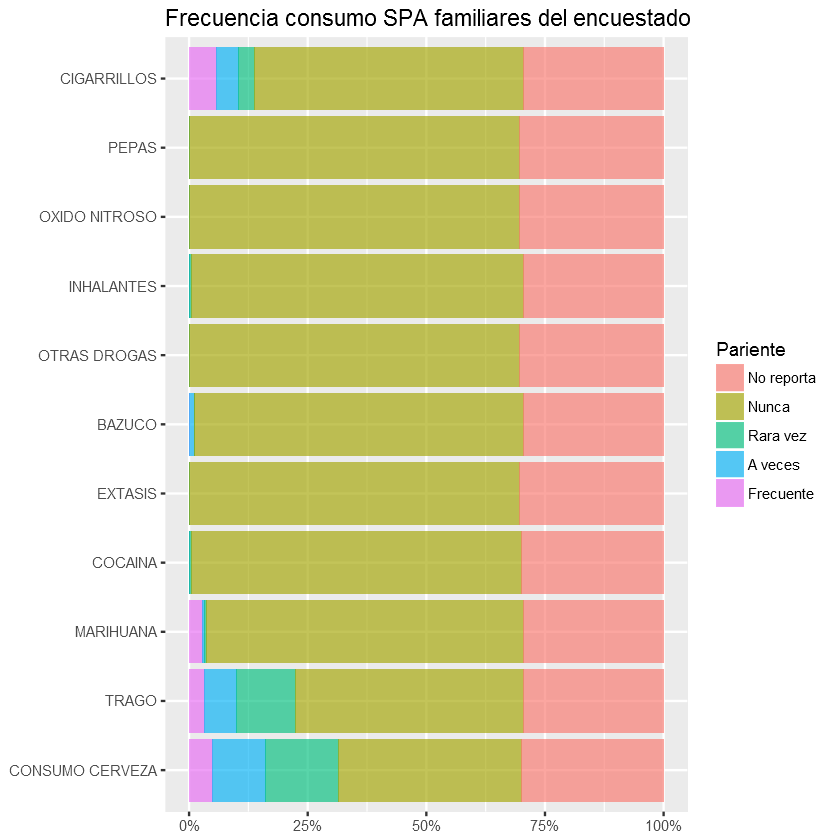

In [38]:
SPA_otro_familiar=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[3]]
colnames(SPA_otro_familiar)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[3]]
#head(SPA_otro_familiar)

props_SPA_otro_familiar=NULL
for(i in 1:ncol(SPA_otro_familiar)){
    props_SPA_otro_familiar=cbind(props_SPA_otro_familiar,table(SPA_otro_familiar[,i]))
}
colnames(props_SPA_otro_familiar)=colnames(SPA_otro_familiar)
props_SPA_otro_familiar=props_SPA_otro_familiar[rowSums(props_SPA_otro_familiar)>0,]
props_SPA_otro_familiar=props_SPA_otro_familiar[,colSums(props_SPA_otro_familiar)>0]
prop.table(props_SPA_otro_familiar,2)
prop_SPA_otro_familiar=melt(prop.table(props_SPA_otro_familiar,margin = 2))
colnames(prop_SPA_otro_familiar)=c("Pariente","Sustancia","Proporción")

ggplot(prop_SPA_otro_familiar,aes(x = Sustancia, y=Proporción,fill=Pariente))+
geom_bar(position = "fill",stat = "identity",alpha = .65) + 
scale_y_continuous(labels = percent_format())+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
labs(title="Frecuencia consumo SPA familiares del encuestado")+
coord_flip()
ggsave(paste("Frecuencia consumo SPA familiares del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)


,Fuente,Promedio
1,CONSUMO CERVEZA,4.19502074688797
2,TRAGO,1.74273858921162
11,CIGARRILLOS,1.49377593360996
3,MARIHUANA,0.129322268327801
8,INHALANTES,0.016597510373444


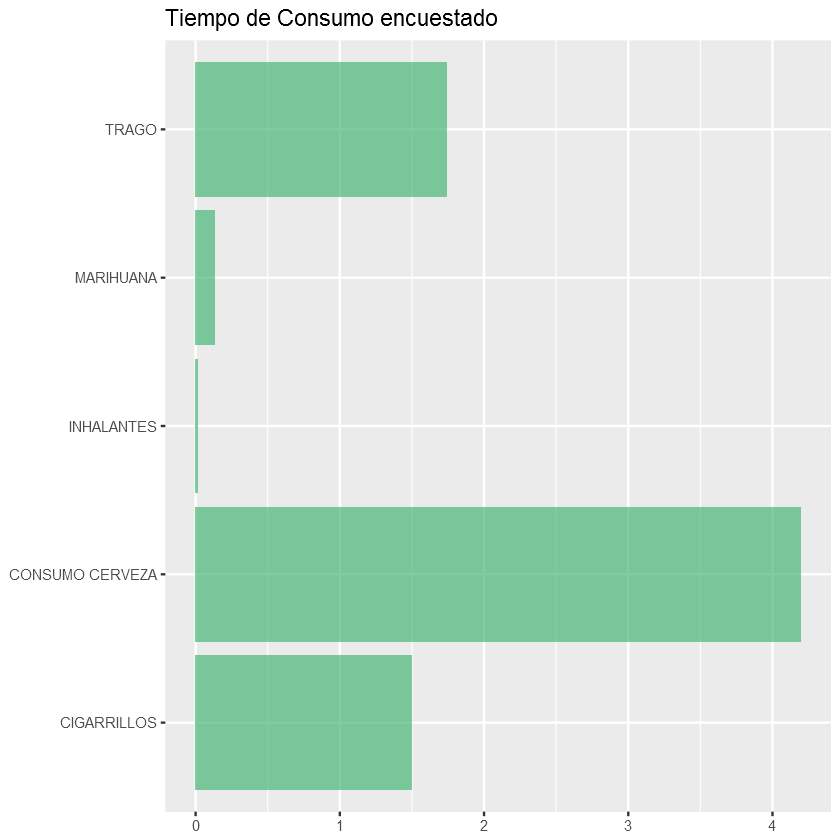

In [39]:
SPA_tiempo_consumo_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[4]]
colnames(SPA_tiempo_consumo_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[4]]
#head(SPA_tiempo_consumo_encuestado)

tiempo_consumo_encuestado_prom=data.frame(colMeans(SPA_tiempo_consumo_encuestado))
colnames(tiempo_consumo_encuestado_prom)="Promedio"
tiempo_consumo_encuestados_prom=data.frame(Fuente=rownames(tiempo_consumo_encuestado_prom),Promedio=tiempo_consumo_encuestado_prom$Promedio)
tiempo_consumo_encuestados_prom=tiempo_consumo_encuestados_prom[tiempo_consumo_encuestados_prom$Promedio>0,]
tiempo_consumo_encuestados_prom=tiempo_consumo_encuestados_prom[order(-tiempo_consumo_encuestados_prom$Promedio),]
tiempo_consumo_encuestados_prom

ggplot(tiempo_consumo_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Tiempo de Consumo encuestado")
ggsave(paste("Tiempo de Consumo encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,Fuente,Promedio
1,CONSUMO CERVEZA,4.18257261410788
2,TRAGO,2.36929460580913
11,CIGARRILLOS,1.61825726141079
3,MARIHUANA,0.327800829875519
6,BAZUCO,0.182572614107884
8,INHALANTES,0.178423236514523


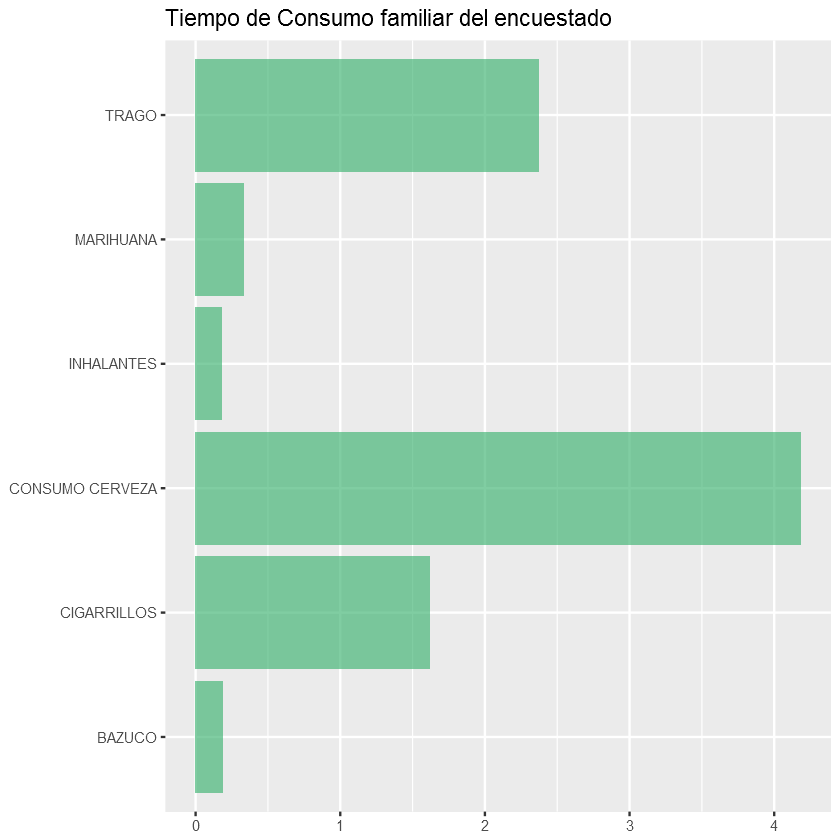

In [40]:
SPA_tiempo_consumo_familiar_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[5]]
colnames(SPA_tiempo_consumo_familiar_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[5]]
#head(SPA_tiempo_consumo_familiar_encuestado)

tiempo_consumo_familiar_encuestado_prom=data.frame(colMeans(SPA_tiempo_consumo_familiar_encuestado))
colnames(tiempo_consumo_familiar_encuestado_prom)="Promedio"
tiempo_consumo_familiar_encuestados_prom=data.frame(Fuente=rownames(tiempo_consumo_familiar_encuestado_prom),Promedio=tiempo_consumo_familiar_encuestado_prom$Promedio)
tiempo_consumo_familiar_encuestados_prom=tiempo_consumo_familiar_encuestados_prom[tiempo_consumo_familiar_encuestados_prom$Promedio>0,]
tiempo_consumo_familiar_encuestados_prom=tiempo_consumo_familiar_encuestados_prom[order(-tiempo_consumo_familiar_encuestados_prom$Promedio),]
tiempo_consumo_familiar_encuestados_prom

ggplot(tiempo_consumo_familiar_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Tiempo de Consumo familiar del encuestado")
ggsave(paste("Tiempo de Consumo familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,Fuente,Promedio
1,CONSUMO CERVEZA,0.336099585062241
2,TRAGO,0.136929460580913
11,CIGARRILLOS,0.128630705394191
3,MARIHUANA,0.012448132780083
4,COCAINA,0.004149377593361
5,EXTASIS,0.004149377593361
6,BAZUCO,0.004149377593361
7,OTRAS DROGAS,0.004149377593361
8,INHALANTES,0.004149377593361
9,OXIDO NITROSO,0.004149377593361


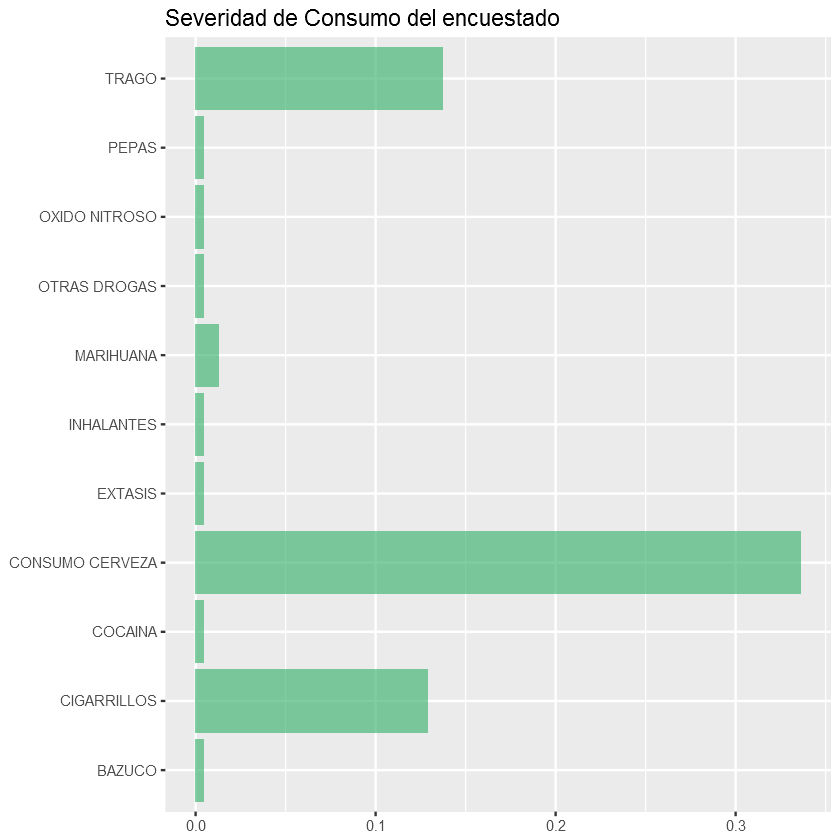

In [41]:
SPA_severidad_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[6]]
colnames(SPA_severidad_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[6]]
# head(SPA_severidad_encuestado)

severidad_encuestado_prom=data.frame(colMeans(SPA_severidad_encuestado))
colnames(severidad_encuestado_prom)="Promedio"
severidad_encuestados_prom=data.frame(Fuente=rownames(severidad_encuestado_prom),Promedio=severidad_encuestado_prom$Promedio)
severidad_encuestados_prom=severidad_encuestados_prom[severidad_encuestados_prom$Promedio>0,]
severidad_encuestados_prom=severidad_encuestados_prom[order(-severidad_encuestados_prom$Promedio),]
severidad_encuestados_prom

ggplot(severidad_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Severidad de Consumo del encuestado")
ggsave(paste("Severidad de Consumo del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)

,Fuente,Promedio
1,CONSUMO CERVEZA,0.468879668049793
2,TRAGO,0.224066390041494
11,CIGARRILLOS,0.195020746887967
3,MARIHUANA,0.182572614107884
6,BAZUCO,0.0829875518672199
4,COCAINA,0.020746887966805
8,INHALANTES,0.012448132780083


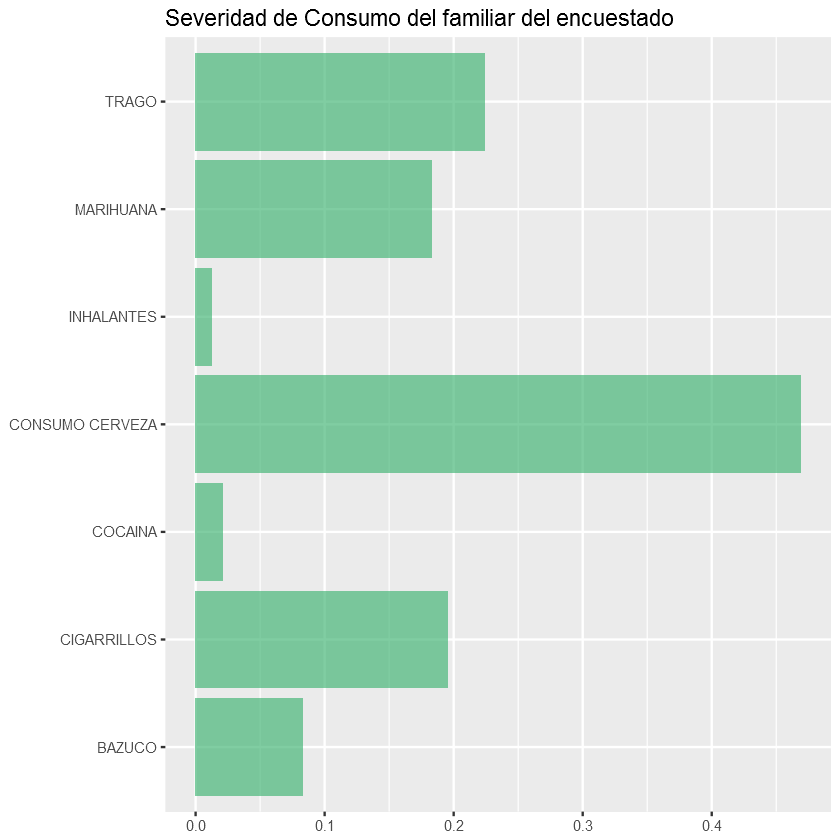

In [42]:
SPA_severidad_familiar_encuestado=dtbl_SPA[,colnames(dtbl_SPA)==unique(vars_SPA$React)[7]]
colnames(SPA_severidad_familiar_encuestado)=vars_SPA$Escala[vars_SPA$React==unique(vars_SPA$React)[7]]
# head(SPA_severidad_familiar_encuestado)

severidad_familiar_encuestado_prom=data.frame(colMeans(SPA_severidad_familiar_encuestado))
colnames(severidad_familiar_encuestado_prom)="Promedio"
severidad_familiar_encuestados_prom=data.frame(Fuente=rownames(severidad_familiar_encuestado_prom),Promedio=severidad_familiar_encuestado_prom$Promedio)
severidad_familiar_encuestados_prom=severidad_familiar_encuestados_prom[severidad_familiar_encuestados_prom$Promedio>0,]
severidad_familiar_encuestados_prom=severidad_familiar_encuestados_prom[order(-severidad_familiar_encuestados_prom$Promedio),]
severidad_familiar_encuestados_prom

ggplot(severidad_familiar_encuestados_prom,aes(x=Fuente,y=Promedio))+ 
geom_bar(stat = "identity", alpha = .65,fill = "mediumseagreen")+
theme(axis.title.x=element_blank())+
theme(axis.title.y=element_blank())+
coord_flip()+
labs(title="Severidad de Consumo del familiar del encuestado")
ggsave(paste("Severidad de Consumo del familiar del encuestado.jpeg"), width = size_pic_w, height = size_pic_h)
